**Note to GitHub viewers:** The internal links within this document may not work on GitHub's interface. For the best experience and to enable all features, please view this notebook in a Jupyter environment.


# Predicting Management Salary from Email Network Data

## 1. Introduction

This project is part of a comprehensive data science curriculum and serves a dual purpose: it is an academic exercise in applying complex network analysis techniques, and a portfolio piece demonstrating real-world application of data science principles. The focus is on the analysis of a company's internal email network, aiming to predict which employees are likely to be receiving a management-level salary. Nodes in this network represent the employees, while edges indicate at least one email exchange between any two employees. The nodes are further characterized by attributes indicating department affiliation and whether the employee is on a management salary.

The challenge lies in predicting the probability of management salary status for employees where this information is not directly observed. The predictive model's efficacy will be evaluated using the Area Under the Receiver Operating Characteristic Curve (AUC), a robust metric for binary classification tasks.

### 1.1 Objectives

- Conduct exploratory data analysis on the company's email network data to uncover underlying patterns and insights.
- Utilize network analysis techniques to engineer features that can inform the likelihood of management salary status.
- Implement and train a machine learning classifier using `scikit-learn` to predict the management salary status.
- Evaluate the model's predictive performance with the AUC, providing a clear metric for comparison in a professional context.

### 1.2 Methodology

Leveraging Python's rich ecosystem, this analysis will utilize libraries such as `networkx` for network construction and analysis, `pandas` for data wrangling, and `scikit-learn` for predictive modeling. The project will unfold over several stages:

1. **Data Exploration**: Investigate the network's structure and node attributes to gain preliminary insights.
2. **Feature Engineering**: Develop a feature set from the network data to capture the nuances influencing management salary status.
3. **Model Building**: Apply classification algorithms to train a model on nodes with known salary information.
4. **Prediction**: Extend the model to forecast salary status for nodes with missing management salary data.
5. **Evaluation**: Quantify the model's performance with AUC, ensuring a rigorous assessment suitable for both academic scrutiny and industry standards.

Through this project, I aim to not only fulfill academic requirements but also to craft a robust model that showcases my ability to translate data analysis into actionable business insights, an essential skill for a data scientist in a dynamic professional environment.


# Table of Contents
1. [Introduction](#1.-Introduction)
   - 1.1 [Objectives](#1.1-Objectives)
   - 1.2 [Methodology](#1.2-Methodology)
2. [Environment Setup](#2.-Environment-Setup)
3. [Loading the Network Data](#3.-Loading-the-Network-Data)
4. [Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))
   - 4.1 [Extracting Attributes into a DataFrame](#4.1-Extracting-Attributes-into-a-DataFrame)
   - 4.2 [Initial Network Exploration](#4.2-Initial-Network-Exploration)
   - 4.3 [Network Visualization](#4.3-Network-Visualization)
       - 4.3.1 [Insights and Feature Hypothesis](#4.3.1-Insights-and-Feature-Hypothesis)
5. [Feature Engineering and Selection](#5.0-Feature-Engineering-and-Selection)
   - 5.1 [Network Centrality and Clustering Coefficient Analysis](#5.1-Network-Centrality-and-Clustering-Coefficient-Analysis)
       - 5.1.1 [Network Centrality and Clustering: Feature Significance and Organizational Insights](#5.1.1-Network-Centrality-and-Clustering:-Feature-Significance-and-Organizational-Insights)
   - 5.2 [Internal and Cross-Departmental Connectivity](#5.2-Internal-and-Cross-Departmental-Connectivity)
       - 5.2.1 [Cross-Department Connections](#5.2.1-Cross-Department-Connections)
       - 5.2.2 [Internal-Department Clustering](#5.2.2-Internal-Department-Clustering)
   - 5.3 [Aggregate Network Measures](#5.3-Aggregate-Network-Measures)
       - 5.3.1 [Average Neighbor Degree](#5.3.1-Average-Neighbor-Degree)
       - 5.3.2 [Neighbor Diversity](#5.3.2-Neighbor-Diversity)
   - 5.4 [Derived Statistical Features](#5.4-Derived-Statistical-Features)
       - 5.4.1 [Centrality Measures Variance](#5.4.1-Centrality-Measures-Variance)
   - 5.5 [Departmental Affiliation Analysis](#5.5-Departmental-Affiliation-Analysis)
   - 5.6 [Feature Selection Summary Table](#5.6-Feature-Selection-Summary-Table)
6. [Preliminary Model Selection](#6.-Preliminary-Model-Selection)
   - 6.1 [Model Selection and Rationale](#6.1-Model-Selection-and-Rationale)
7. [Data Preparation](#7.-Data-Preparation)
   - 7.1 [Dataframe Initialization](#7.1-Dataframe-Initialization)
   - 7.2 [Separation of Labeled and Unlabeled Data](#7.2-Separation-of-Labeled-and-Unlabeled-Data)
   - 7.3 [Final Data Check](#7.3-Final-Data-Check)
       - 7.3.1 [Final Data Check Results](#7.3.1-Final-Data-Check-Results)
   - 7.4 [Data Splitting](#7.4-Data-Splitting)
8. [Baseline Model Performance Score](#8.-Baseline-Model-Performance-Score)
9. [Impact of Feature Scaling on Model Performance](#9.-Impact-of-Feature-Scaling-on-Model-Performance)
   - 9.1 [Feature Scaling Results](#9.1-Feature-Scaling-Results)
10. [Feature Importance Analysis](#10.-Feature-Importance-Analysis)
    - 10.1 [Model Performance with & without Selected Features](#10.1-Model-Performance-with-&-without-Selectected-Features)
    - 10.2 [Observations and Actions](#10.2-Observations-and-Actions)
11. [Model Selection for Hyperparameter Tuning](#11.-Model-Selection-for-Hyperparameter-Tuning)
    - 11.1 [Overview](#11.1-Overview)
    - 11.2 [Selected Models for Hyperparameter Tuning](#11.2-Selected-Models-for-Hyperparameter-Tuning)
    - 11.3 [Considerations](#11.3-Considerations)
    - 11.4 [Conclusion](#11.4-Conclusion)
12. [Hyperparameter Tuning](#12.-Hyperparameter-Tuning)
    - 12.1 [Initial Hyperparameter Tuning Performance Results](#12.1-Initial-Hyperparameter-Tuning-Performance-Results)
    - 12.2 [Rationale for Selecting Random Forest and XGBoost for Deeper Tuning](#12.2-**Rationale-for-Selecting-Random-Forest-and-XGBoost-for-Deeper-Tuning**)
    - 12.3 [Conclusion](#12.3-**Conclusion**)
13. [Deeper Hyperparameter Tuning](#13-Deeper-Hyperparameter-Tuning)
    - 13.1 [Final Tuning Results](#13.1-Final-Tuning-Results)
    - 13.2 [Analysis](#13.2-Analysis)
    - 13.3 [Conclusion](#13.3-Conclusion)


## 2. Environment Setup

The following cell sets up our Python environment for the project. It includes importing necessary libraries for data manipulation, network analysis, machine learning, and visualization.


In [1]:
# Setup and Imports

# Standard Library Imports
import pickle
import warnings

# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Statistical Methods
from scipy.stats import entropy, mannwhitneyu, uniform, randint

# Network Analysis
import networkx as nx

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datashader as ds
import datashader.transfer_functions as tf
from matplotlib.cm import Blues
from datashader.bundling import hammer_bundle
%matplotlib inline

# Machine Learning: Model Selection and Evaluation
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     cross_validate, RandomizedSearchCV,
                                     StratifiedKFold)
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer

# Machine Learning: Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Machine Learning: Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Machine Learning: Pipeline
from sklearn.pipeline import Pipeline

# Machine Learning: Feature Selection
from sklearn.feature_selection import RFECV, SelectFromModel

# Machine Learning: Model Interpretation
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Suppress warnings to keep the notebook clean
warnings.filterwarnings('ignore')


## 3. Loading the Network Data

The network data is stored in a pickled file format.

In [2]:
# Ensure the path to the 'email_prediction_NEW.txt' file is correct relative to the notebook's directory
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))


## 4. Exploratory Data Analysis (EDA)

In this phase, we delve into the structure and properties of the company's email network. The goal of EDA is to develop an understanding of the network's characteristics and identify patterns that might inform our predictive modeling.

### 4.1 Extracting Attributes into a DataFrame
Extract the node attributes in the graph into DataFrame to faciliate the EDA process.

In [3]:
# Initialize a dataframe, using the nodes as the index
EDA_df = pd.DataFrame(index=G.nodes())
EDA_df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
EDA_df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

EDA_df.head()

,Department,ManagementSalary
0,1,0.0
1,1,NaN
581,3,0.0
6,25,1.0
65,4,NaN


### 4.2 Initial Network Exploration

With the network data loaded into the graph `G`, we will commence our analysis by examining its basic properties. This exploration will include checking the number of nodes and edges, inspecting any node attributes available, and understanding the general characteristics of the network. 

In [4]:
print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("-" * 50)  # Prints a line of dashes

# Display the first 10 nodes along with their attributes
for node, attributes in list(G.nodes(data=True))[0:10]:
    print(f"Node {node}: {attributes}")
print("-" * 50)  # Prints a line of dashes

# Display the first 10 edges along with any associated attributes
print("First 10 edges with attributes:")
print(list(G.edges(data=True))[0:10])
print("-" * 50)  # Prints a line of dashes

The graph has 1005 nodes and 16706 edges.
--------------------------------------------------
Node 0: {'Department': 1, 'ManagementSalary': 0.0}
Node 1: {'Department': 1, 'ManagementSalary': nan}
Node 581: {'Department': 3, 'ManagementSalary': 0.0}
Node 6: {'Department': 25, 'ManagementSalary': 1.0}
Node 65: {'Department': 4, 'ManagementSalary': nan}
Node 64: {'Department': 25, 'ManagementSalary': 1.0}
Node 73: {'Department': 1, 'ManagementSalary': 0.0}
Node 74: {'Department': 1, 'ManagementSalary': 0.0}
Node 459: {'Department': 1, 'ManagementSalary': 0.0}
Node 268: {'Department': 39, 'ManagementSalary': 0.0}
--------------------------------------------------
First 10 edges with attributes:
[(0, 0, {}), (0, 1, {}), (0, 581, {}), (0, 6, {}), (0, 65, {}), (0, 64, {}), (0, 73, {}), (0, 74, {}), (0, 459, {}), (0, 268, {})]
--------------------------------------------------


### 4.3 Network Visualization

The first attempt to visualize the company's email network was through a basic network plot using **`networkx`**'s default layout. This proved inadequate as it yielded an indiscernible 'hairball', obscuring the network's structure due to the dense interconnections between nodes.
Iwe explored more sophisticated layout algorithms, such as Kamada-Kawai, which aims to space out nodes evenly, respecting their distances. However, our complex network still appeared cluttered and challenging to interpret.

The breakthrough came with the application of **`hammer_bundle`** from Datashader, an advanced edge bundling method. Edge bundling coalesces and displays parallel edges, substantially improving readability by clarifying how central nodes connect across the network. This technique provided a much-needed visual clarity, revealing the intricate web of communications that could hint at the hierarchical and managerial structures within the compay.
ies.


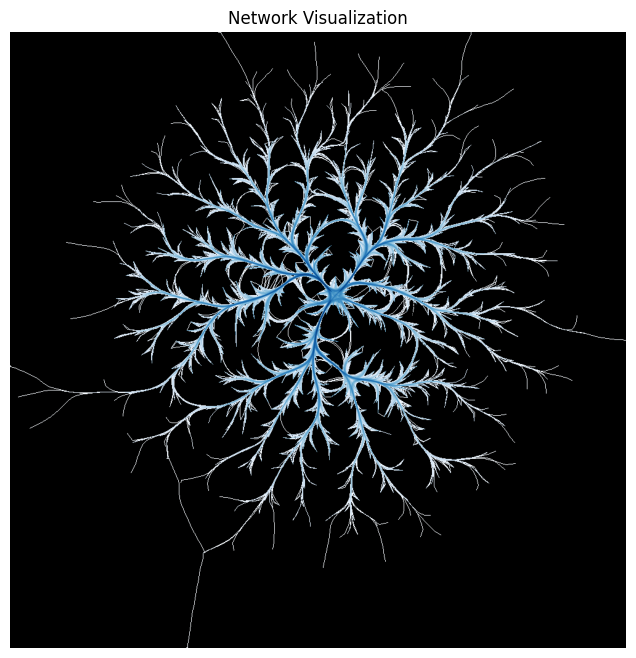

In [5]:
# Increase the figure size
plt.figure(figsize=(10, 8))

# Use a different layout algorithm
pos = nx.kamada_kawai_layout(G, weight=None)

# Convert nodes positions to a format that can be used by hammer_bundle
nodes_df = pd.DataFrame(list(pos.values()), index=G.nodes(), columns=['x', 'y'])
nodes_df['node'] = nodes_df.index

# Convert edges to a DataFrame
edges_df = pd.DataFrame(list(G.edges()), columns=['source', 'target'])

# Apply the edge bundling algorithm
bundled_graph = hammer_bundle(nodes_df, edges_df)

# Create a datashader canvas
canvas = ds.Canvas(plot_width=1000, plot_height=1000)

# Lay down the background
background = canvas.points(nodes_df, 'x', 'y')

# Create the datashader graph plot
lines = canvas.line(bundled_graph, 'x', 'y', agg=ds.count())

# Shade
shaded = tf.shade(lines, cmap=Blues, how='log')

# Add the background to the shaded
img = tf.set_background(shaded, "black")

# Convert the Datashader image to a format that can be displayed by matplotlib
plt.imshow(img.to_pil(), aspect='equal')
plt.axis('off')
plt.title('Network Visualization')
plt.show()


#### 4.3.1 Insights and Feature Hypothesis

The network visualization reveals a structure with central nodes highly connected to various branches, suggesting these individuals have a role in facilitating communication across different parts of the organization. This observation supports the use of centrality measures as features in our predictive model, as they quantify the importance of a node within the network, which is a characteristic we expect managers to have. Additionally, the presence of nodes that connect different branches aligns with our hypothesis that inter-departmental connectors may hold managerial positions due to the necessity of overseeing multiple areas. Consequently, we will include metrics like betweenness centrality to capture these potential managerial roles.

## 5.0 Feature Engineering and Selection

### 5.1 Network Centrality and Clustering Coefficient Analysis

In this section, we calculate and analyze various centrality measures and the clustering coefficient for each node in the network. 
These metrics will help us understand the influence, prominence, and connectivity patterns of individuals within the company's email network. 
The analysis will also include the examination of these measures in relation to the presence of a management salary, providing insights into characteristics that may indicate leadership roles.

### Centrality Measures
- **Degree Centrality**
- **Closeness Centrality**
- **Betweenness Centrality**
- **Eigenvector Centrality**
- **PageRank**

### Clustering Coefficient
- Measures the degree to which nodes in a graph tend to cluster together.

### Hubs and Authorities
- **Hubs**: Nodes that serve as major connectors within the network.
- **Authorities**: Nodes that are highly linked to by hubs, indicating nodes of high-value information or decision-making.

We will visualize these metrics and discuss their implications for identifying employees who are likely receiving a management salary and for organizational insights.

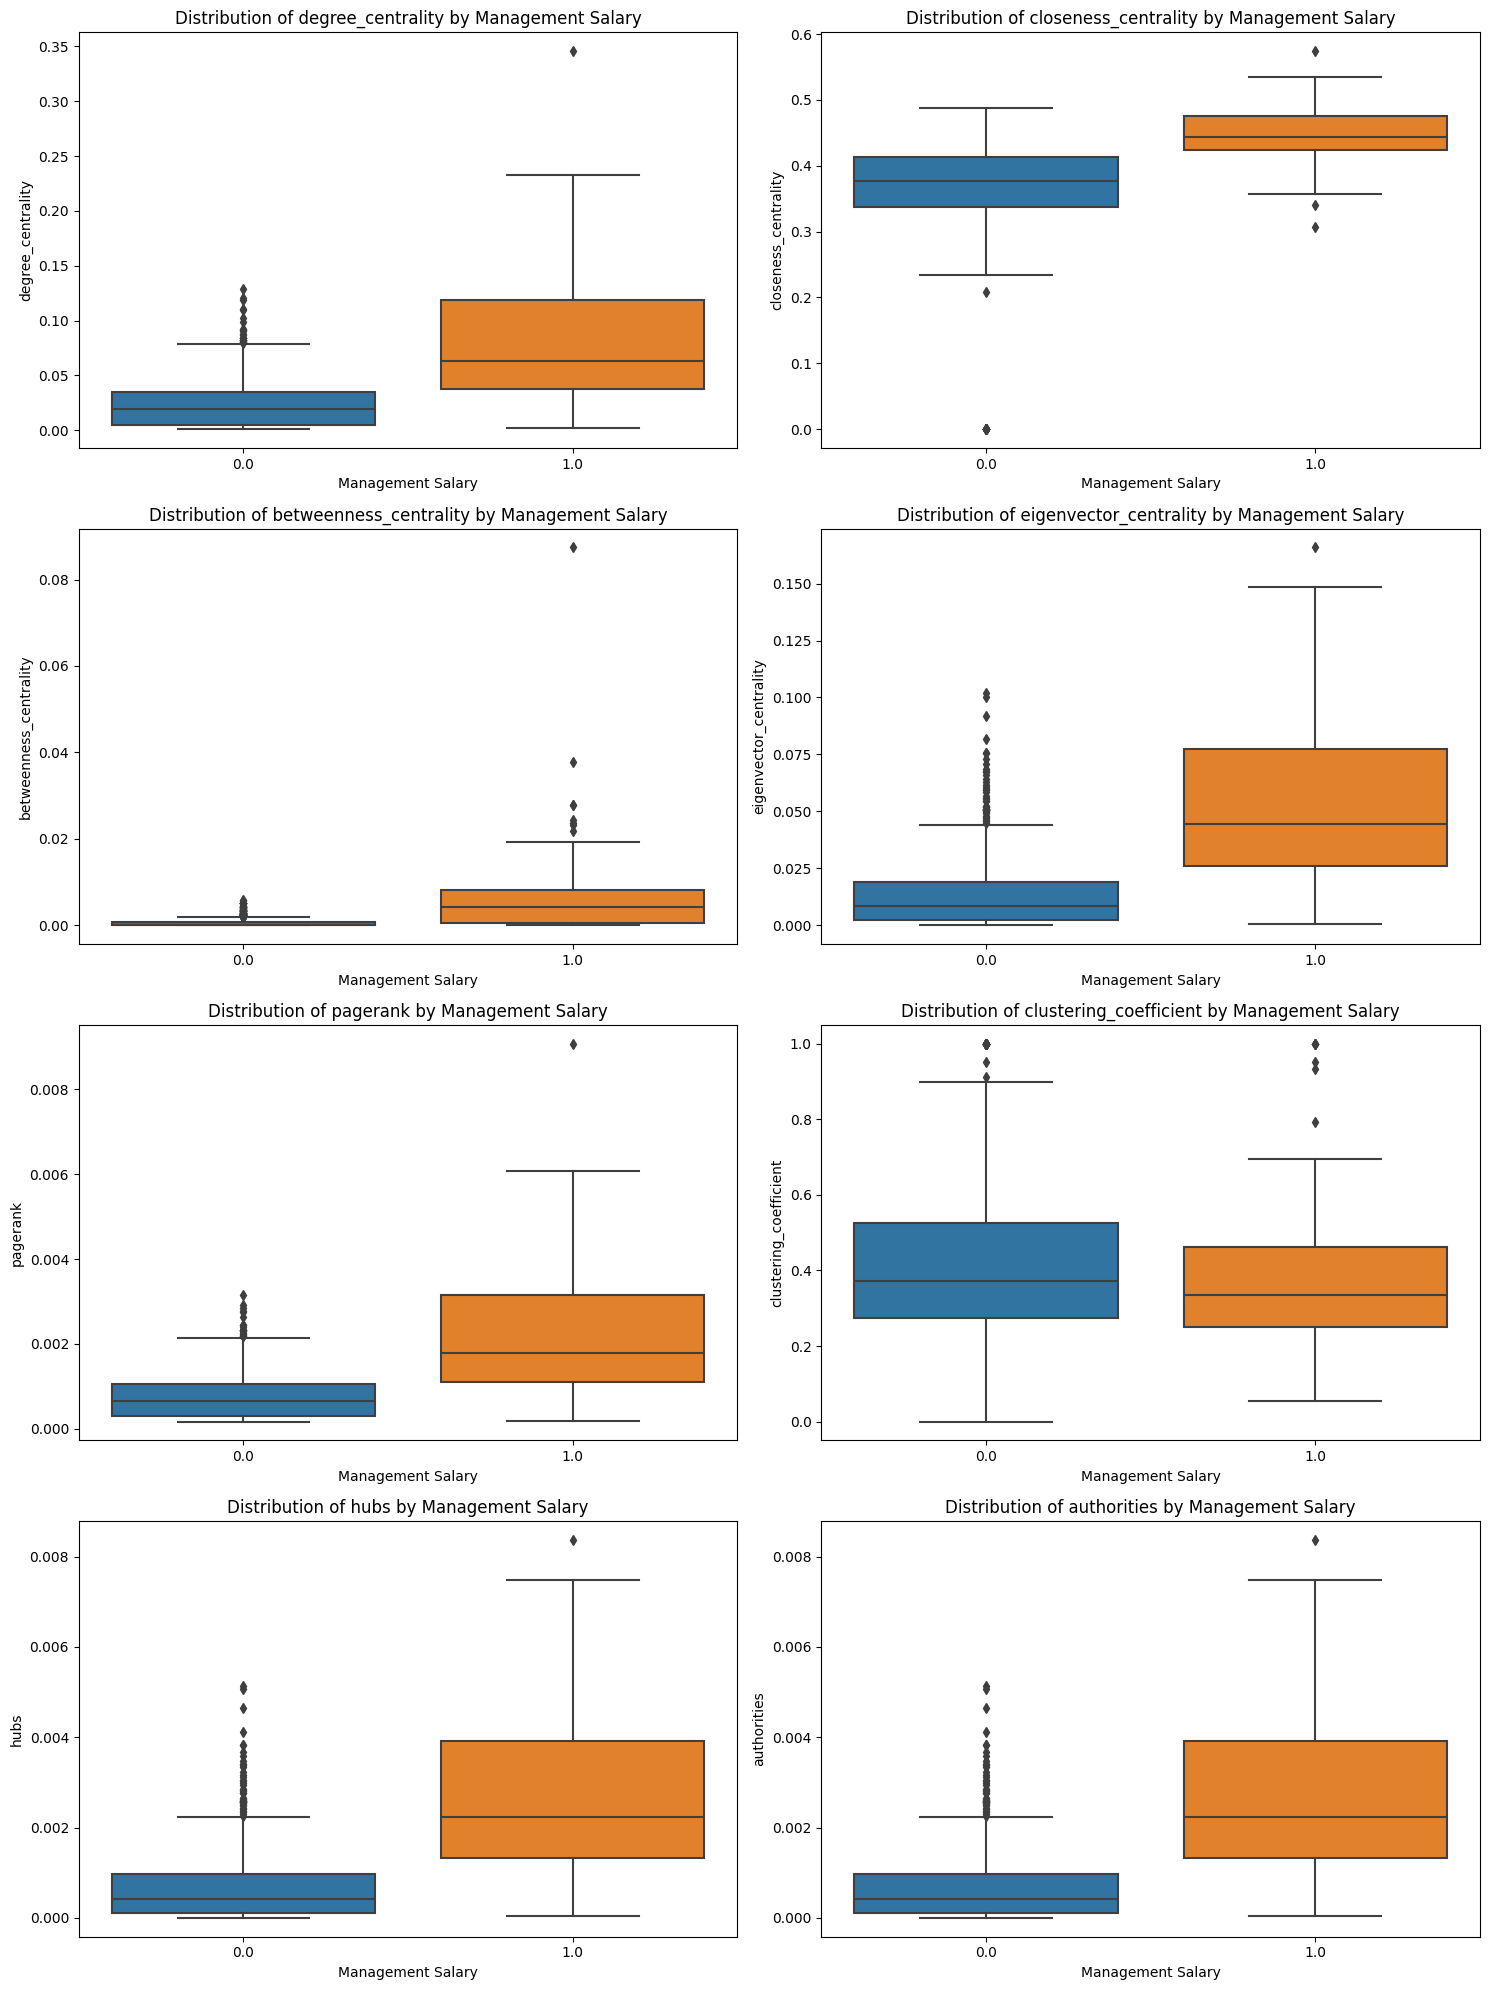

In [6]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
# Note: This can fail to converge for some graphs or require a large number of iterations.
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

# Calculate PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Calculate clustering coefficient for each node
clustering_coefficient = nx.clustering(G)

# Compute HITS (Hubs and Authorities)
hubs, authorities = nx.hits(G)

# Create a DataFrame from the centrality and clustering measures
centrality_df = pd.DataFrame({
    'degree_centrality': pd.Series(degree_centrality),
    'closeness_centrality': pd.Series(closeness_centrality),
    'betweenness_centrality': pd.Series(betweenness_centrality),
    'eigenvector_centrality': pd.Series(eigenvector_centrality),
    'pagerank': pd.Series(pagerank),
    'clustering_coefficient': pd.Series(clustering_coefficient),
    'hubs': pd.Series(hubs),
    'authorities': pd.Series(authorities)
})

# Retrieve management salary information for each node
management_salary = nx.get_node_attributes(G, 'ManagementSalary')

# Add management salary information to the DataFrame
centrality_df['management_salary'] = pd.Series(management_salary)

# Define a list of centrality measures for iteration
centrality_measures = [
    'degree_centrality',
    'closeness_centrality',
    'betweenness_centrality',
    'eigenvector_centrality',
    'pagerank',
    'clustering_coefficient',
    'hubs',
    'authorities'
]

# Adjust the size of the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Use a loop to create the boxplots, now arranging them in a 4x2 grid
for i, measure in enumerate(centrality_measures):
    # Determine the position of the current plot
    row = i // 2
    col = i % 2
    sns.boxplot(x='management_salary', y=measure, data=centrality_df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {measure} by Management Salary')
    axes[row, col].set_xlabel('Management Salary')
    axes[row, col].set_ylabel(measure)

# Adjust the layout so plots do not overlap
plt.tight_layout()
plt.show()

### 5.1.1 Network Centrality and Clustering: Feature Significance and Organizational Insights

#### Degree Centrality
- **Feature Usage**: Yes.
- **Rationale**: Indicates extensive interaction within the network, suggesting a correlation with management roles.
- **Business Insight**: Can identify influential employees for roles requiring broad communication, aiding in change management or strategic initiatives.

#### Closeness Centrality
- **Feature Usage**: Yes.
- **Rationale**: Reflects the accessibility expected from managers due to their proximity to other nodes.
- **Business Insight**: Useful for optimizing information flow and operational response times by understanding communication efficiency.

#### Betweenness Centrality
- **Feature Usage**: Yes.
- **Rationale**: Suggests a role in bridging communication between other nodes, characteristic of managerial positions.
- **Business Insight**: Identifies potential bottlenecks or key individuals in knowledge transfer within the organization.

#### Eigenvector Centrality
- **Feature Usage**: Yes.
- **Rationale**: Signifies influential positions within the company, potentially indicative of management.
- **Business Insight**: Reveals individuals linked to other influential people, valuable for leadership identification and mentorship programs.

#### PageRank
- **Feature Usage**: Yes.
- **Rationale**: Indicates a higher level of influence in the network, important for predicting management positions.
- **Business Insight**: Identifies key opinion leaders instrumental in driving company culture or leading internal campaigns.

#### Hubs
- **Feature Usage**: Tentative.
- **Rationale**: While indicative of connectivity, it does not necessarily imply a management role but could complement other features.
- **Business Insight**: Helps in organizational design by identifying communication junctions that need reinforcement.

#### Authorities
- **Feature Usage**: Yes.
- **Rationale**: Authority figures are decision-makers, common to management roles, making it a relevant feature.
- **Business Insight**: Pinpoints individuals who are likely sources of expertise and trusted information, beneficial for assigning project leads or subject matter experts.

#### Clustering Coefficient
- **Feature Usage**: Tentative.
- **Rationale**: May provide insights into the community structure around a node rather than individual influence.
- **Business Insight**: Indicates tight-knit groups or silos within the organization, with implications for team dynamics and innovation diffusion.


### 5.2 Internal and Cross-Departmental Connectivity
- **Cross-department Connections**: The number of connections a person has outside their department might be indicative of cross-departmental influence or managerial responsibilities.
- **Internalin-department Clusteri**ng: How interconnected a person’s department is internally, which might differ for managers and non-managers.

#### 5.2.1 Cross-Department Connections
This feature quantifies the number of connections an individual has with employees from different departments. A higher number of such connections may suggest that the individual has a role involving cross-departmental collaboration or a position that requires oversight across different areas of the organization, traits often associated with managerial responsibilities. We will assess whether individuals with management salaries have a significantly higher number of inter-department connections compared to their non-management counterparts, which would validate the utility of this feature for our predictive model.

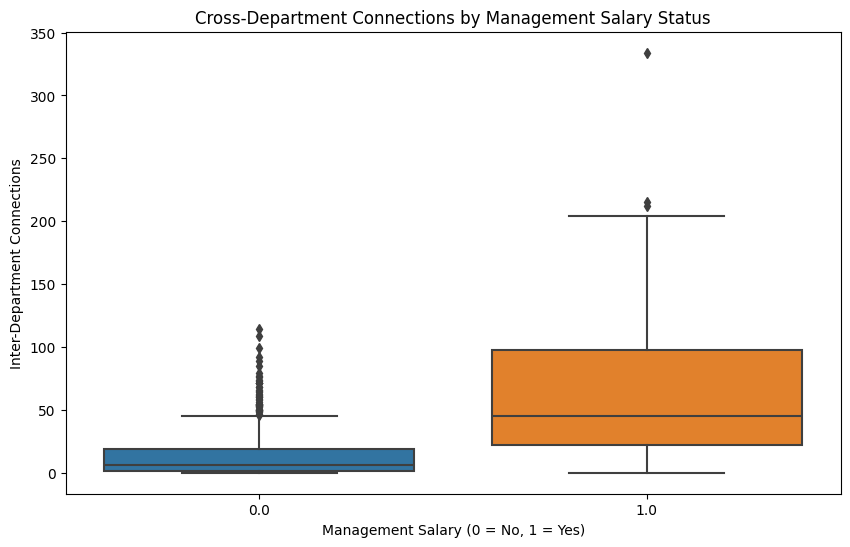

In [7]:
# Initialize the inter-department connections column with zeros
EDA_df['InterDeptConnections'] = 0

# Iterate over all nodes
for node in G.nodes():
    node_dept = G.nodes[node]['Department']  # Get the department of the current node
    inter_dept_count = 0  # Initialize the counter for inter-department connections
    
    # Iterate over all neighbors of the current node
    for neighbor in G.neighbors(node):
        neighbor_dept = G.nodes[neighbor]['Department']  # Get the department of the neighbor
        # If the departments are different, increment the counter
        if neighbor_dept != node_dept:
            inter_dept_count += 1
    
    # Update the DataFrame with the inter-department connection count for the node
    EDA_df.loc[node, 'InterDeptConnections'] = inter_dept_count

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ManagementSalary', y='InterDeptConnections', data=EDA_df)
plt.title('Cross-Department Connections by Management Salary Status')
plt.xlabel('Management Salary (0 = No, 1 = Yes)')
plt.ylabel('Inter-Department Connections')
plt.show()

#### 5.2.1.1 Cross-Department Connections: Feature Significance and Organizational Insights

- **Feature Usage**: Yes.
- **Rationale**: The elevated and more variable number of inter-department connections among management personnel suggests that these roles have broader organizational reach and influence, making this a pertinent feature for identifying management positions.
- **Business Insight**: Identifying employees with extensive inter-department connections can inform strategies for cross-functional team formation, internal networking enhancement, and identifying potential leaders for inter-departmental initiatives.


#### 5.2.2 Internal-Department Clustering
This metric measures the density of connections within an individual's department. It reflects how tightly-knit the departmental network is around a person, potentially indicating their level of influence or centrality within their own department. The hypothesis is that managers may exhibit different clustering patterns compared to non-managers due to their leadership role, which could involve facilitating interactions among team members or being part of a more interconnected core team. We will explore the clustering distributions to determine if this feature can distinguish between management and non-management employees, thus informing its inclusion as a predictive feature.


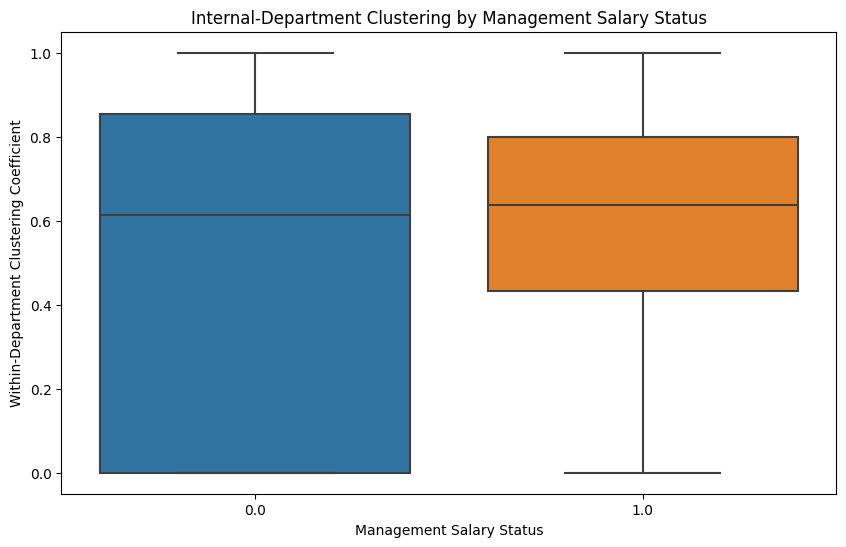

In [8]:
# Add a new column to the dataframe for within-department clustering
EDA_df['WithinDeptClustering'] = 0.0

# Get a unique list of departments
departments = set(nx.get_node_attributes(G, 'Department').values())

# Iterate over each department
for dept in departments:
    # Get the nodes in this department
    dept_nodes = [n for n, attr in G.nodes(data=True) if attr['Department'] == dept]
    
    # Create a subgraph for this department
    dept_subgraph = G.subgraph(dept_nodes)
    
    # Calculate the clustering coefficient for each node in the subgraph
    clustering = nx.clustering(dept_subgraph)
    
    # Assign the clustering value to the corresponding node in the DataFrame
    for node, cluster_value in clustering.items():
        EDA_df.loc[node, 'WithinDeptClustering'] = cluster_value

# Let's now plot the distribution of the within-department clustering coefficient
# by management salary status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ManagementSalary', y='WithinDeptClustering', data=EDA_df)
plt.title('Internal-Department Clustering by Management Salary Status')
plt.xlabel('Management Salary Status')
plt.ylabel('Within-Department Clustering Coefficient')
plt.show()

#### 5.2.2.1 Internal-Department Clustering: Feature Significance and Organizational Insights

- **Feature Usage**: Tentative.
- **Rationale**: Since the median clustering coefficient is similar for both management and non-management, it may not be a strong differentiator on its own. However, the greater variability among non-management employees might capture useful nuances about their work environment that could contribute to the model when used in conjunction with other features.
- **Business Insight**: The variability in clustering within departments for non-management roles may be indicative of differing team structures or collaboration practices. This insight could be useful for identifying departments that may benefit from team-building exercises or collaboration-enhancing initiatives.


### 5.3 Aggregate Network Measures:

- **Average Neighbor Degree**: The average degree of a node’s neighbors can indicate the strategic positioning of a node within the network.
    
- **Neighbor Diversity**: The variety in the departmental affiliation of a node's neighbors.

#### 5.3.1 Average Neighbor Degree

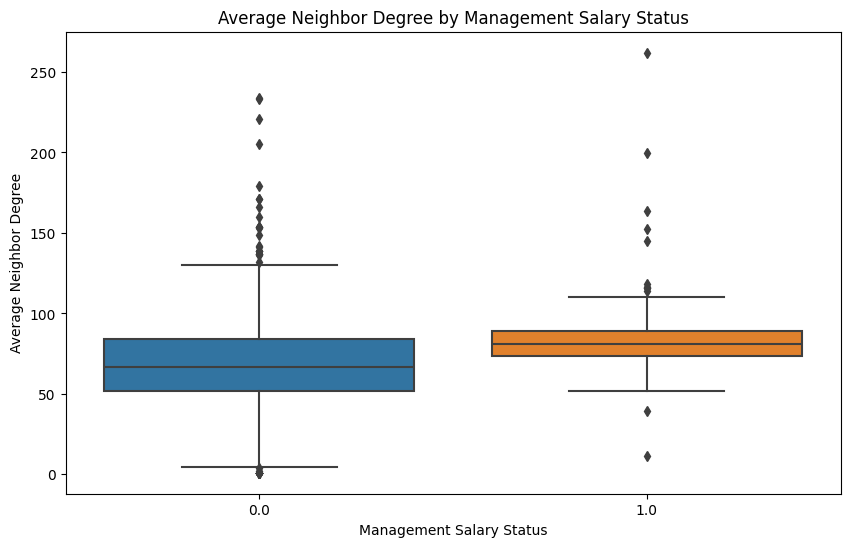

In [9]:
# Calculate the average neighbor degree for each node
avg_neighbor_degree = nx.average_neighbor_degree(G)

# Add to DataFrame
EDA_df['AvgNeighborDegree'] = EDA_df.index.map(avg_neighbor_degree.get)

# Plot the distribution of average neighbor degree by management salary status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ManagementSalary', y='AvgNeighborDegree', data=EDA_df)
plt.title('Average Neighbor Degree by Management Salary Status')
plt.xlabel('Management Salary Status')
plt.ylabel('Average Neighbor Degree')
plt.show()

#### 5.3.1.1 Average Neighbor Degree: Feature Significance and Organizational Insights

- **Feature Usage**: Yes.
- **Rationale**: The higher median average neighbor degree for management nodes suggests that managers are typically connected to well-connected individuals, supporting the hypothesis that managers occupy influential positions within the network. The smaller variance for management also indicates a consistent pattern that could be predictive of management status.
- **Action**: I will include the average neighbor degree as a feature in my predictive model since it seems to differentiate between management and non-management employees. This feature could capture the aspect of network influence which is likely to be associated with management roles.
- **Business Insight**: Beyond the predictive task, a high average neighbor degree could be used to identify potential leaders who are adept at navigating the social structure of the company. This information might be useful for targeting communications, understanding information flow, and designing interventions for organizational change.


#### 5.3.2 Neighbor Diversity

In [10]:
# Function to calculate diversity
def calculate_diversity(node):
    neighbors = list(G.neighbors(node))
    if len(neighbors) == 0:  # No neighbors, no diversity
        return 0
    neighbor_departments = [G.nodes[n]['Department'] for n in neighbors]
    department_counts = pd.Series(neighbor_departments).value_counts()
    diversity = entropy(department_counts)
    return diversity

# Add to DataFrame
EDA_df['NeighborDiversity'] = EDA_df.index.map(calculate_diversity)



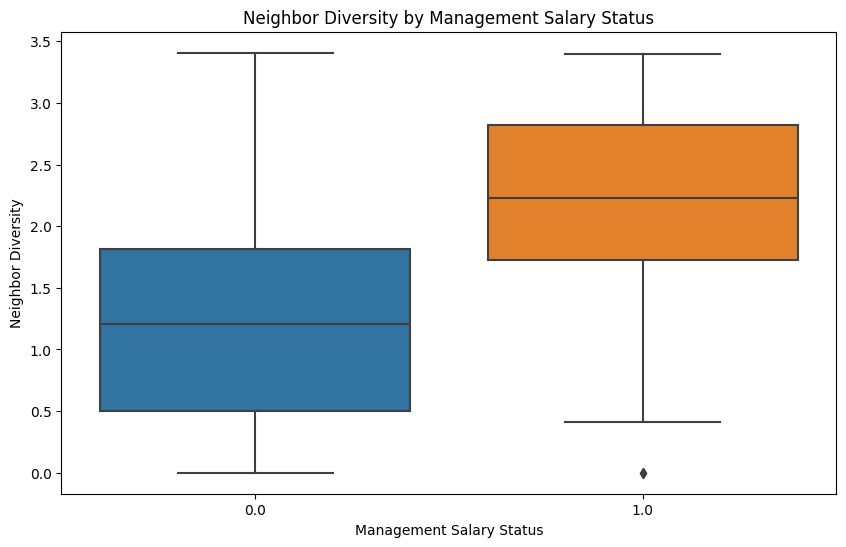

In [11]:
# Plot the distribution of Neighbor Diversity by management salary status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ManagementSalary', y='NeighborDiversity', data=EDA_df)
plt.title('Neighbor Diversity by Management Salary Status')
plt.xlabel('Management Salary Status')
plt.ylabel('Neighbor Diversity')
plt.show()

#### 5.3.2.1 Neighbor Diversity: Feature Significance and Organizational Insights

- **Feature Usage**: Yes.
- **Rationale**: The higher Neighbor Diversity for management suggests that this measure captures the cross-functional nature of managerial roles. Given its distinct distribution for management, it could be a useful feature for predicting management salary status.
- **Action**: I will include Neighbor Diversity as a feature in my predictive model, as it appears to be indicative of management-level communication patterns.
- **Business Insight**: This measure can be valuable for organizational network analysis, identifying employees who bridge different departments and could be key to facilitating cross-departmental collaboration. It also may pinpoint potential leaders for initiatives that require broad organizational reach.

### 5.4 Derived Statistical Features:

Centrality Measures Variance: Variance of centrality measures across the node’s neighborhood.

#### 5.4.1 Centrality Measures Variance

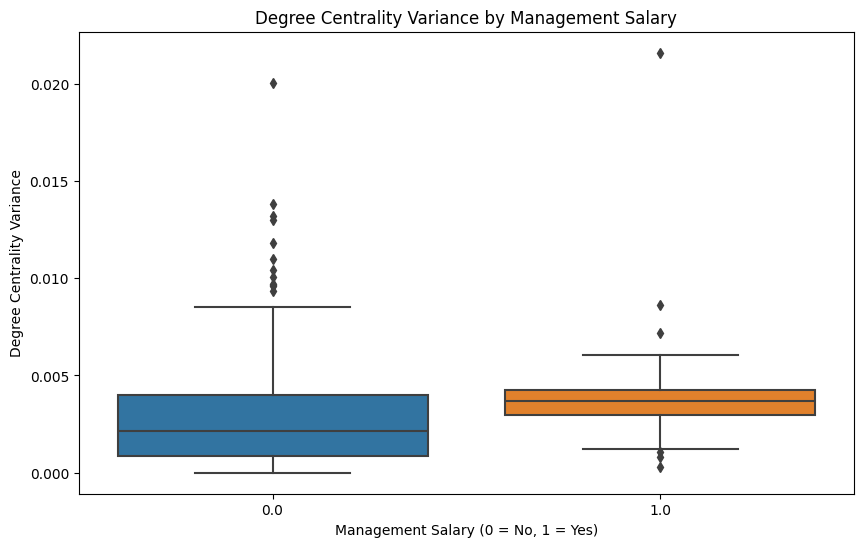

In [12]:
# Assuming 'degree_centrality' is a dictionary of nodes with their degree centrality scores
def neighborhood_centrality_variance(node, centrality_dict):
    neighbors = list(G.neighbors(node))
    if len(neighbors) == 0:  # No neighbors, no variance
        return 0
    neighbor_centrality_scores = [centrality_dict[n] for n in neighbors]
    variance = np.var(neighbor_centrality_scores)
    return variance

# Add variance of degree centrality to DataFrame
EDA_df['DegreeCentralityVariance'] = EDA_df.index.map(lambda x: neighborhood_centrality_variance(x, degree_centrality))

# Plotting the boxplot for Degree Centrality Variance by Management Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='ManagementSalary', y='DegreeCentralityVariance', data=EDA_df)
plt.title('Degree Centrality Variance by Management Salary')
plt.xlabel('Management Salary (0 = No, 1 = Yes)')
plt.ylabel('Degree Centrality Variance')
plt.show()

##### 4.7.1.1 Degree Centrality Variance: Feature Significance and Organizational Insights

- **Feature Usage**: Yes.
- **Rationale**: The higher placement and smaller spread of the management salary box indicate that managers have a more diverse yet consistent variance in their neighbors' centrality. This pattern suggests that managers may occupy unique network positions that bridge different clusters or hierarchies within the organization.
- **Action**: I will include Degree Centrality Variance as a feature in the predictive model. Its distinct pattern for management salary recipients highlights its potential to differentiate between management and non-management roles based on network structure.
- **Business Insight**: The variance in degree centrality can help identify individuals who might act as strategic connectors or influencers within the organization. These insights can inform talent management decisions and the design of training programs for leadership development. It can also serve as a metric to ensure robustness in the internal communication network, preventing over-reliance on a few individuals.

### 5.5 Departmental Affiliation Analysis
Department: Since departmental structure might correlate with management roles, we might one-hot encode departments to treat each as a binary feature . This will create a feature for each department, where the presence (1) or absence (0) of a node in a department is a feature.  Although, first, in order to assess whether we should create these features or not, we will use a bar chart to visualize the variance in management salary distribution, and use a chi-squared test to objectively measure the statistical significance of the association between departmental affiliation and management salary status.

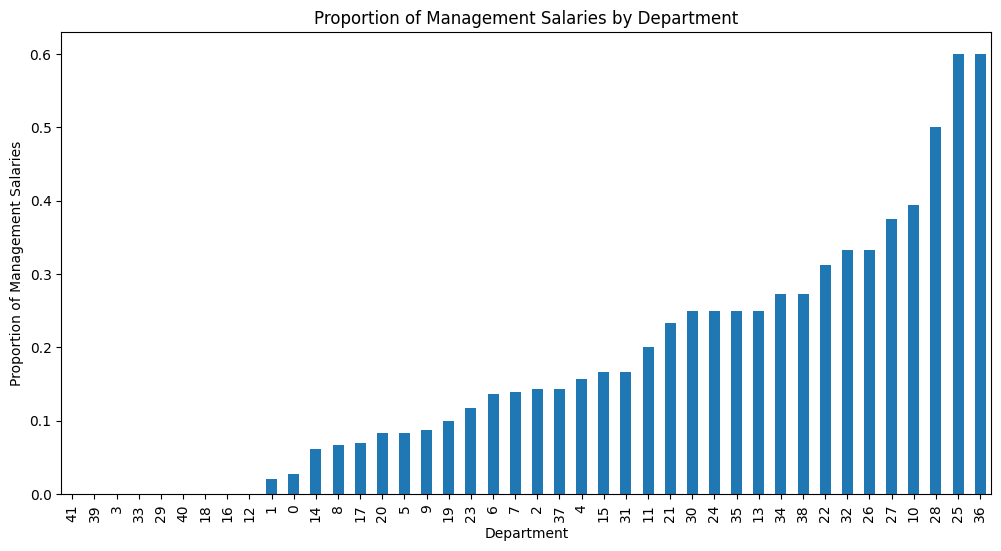

Chi-squared test p-value: 6.299437615026598e-06


In [13]:
# Next, we calculate the proportion of management salaries in each department
management_proportions = EDA_df.groupby('Department')['ManagementSalary'].mean()

# Now, we can visualize the proportions to see the variance across departments
plt.figure(figsize=(12, 6))
management_proportions.sort_values().plot(kind='bar')
plt.title('Proportion of Management Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Management Salaries')
plt.show()

# If we want to test the statistical significance, we could use a chi-squared test
# We'd first need to create a contingency table of the counts of management and non-management salaries in each department

# Assuming a simple binary classification for simplicity
dept_contingency_table = pd.crosstab(EDA_df['Department'], EDA_df['ManagementSalary'])

# Import the chi2_contingency function from SciPy
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(dept_contingency_table)

# Output the p-value to understand if the differences are significant
print(f"Chi-squared test p-value: {p}")


#### 5.5.1 Departmental Affiliation Analysis: Feature Significance and Organizational Insights

- **Feature Usage**: Yes
- **Rationale**: The statistical analysis indicates a significant association between department affiliation and management salary status. Some departments have a notably higher proportion of management salaries, suggesting a relationship between departmental roles and management positions.
- **Action**: I will include departmental information as a feature. The skewness of the distribution point to departments that are potentially structured with a higher concentration of management roles, making it a relevant predictor.
- **Business Insight**: The association between department and management salary status can inform HR strategies, particularly in structuring departments and planning for leadership succession. Departments with a high proportion of management salaries could be targeted for leadership development programs or could be indicative of departments that significantly influence company decisions.


## 5.6 Feature Selection Summary Table

This table encapsulates the key findings from our exploratory data analysis, the rationale for feature inclusion in the predictive model, and the organizational insights gained.

| Feature | Usage | Rationale | Business Insight |
|---------|-------|-----------|------------------|
| Degree Centrality | Yes | Indicates extensive interaction, correlated with management roles | Identifies influential employees; aids in strategic initiatives |
| Closeness Centrality | Yes | Reflects accessibility expected from managers | Optimizes information flow and operational response times |
| Betweenness Centrality | Yes | Suggests a role in bridging communication, characteristic of managers | Identifies key individuals in knowledge transfer |
| Eigenvector Centrality | Yes | Signifies influential positions, potentially indicative of management | Reveals individuals linked to other influencers; valuable for leadership identification |
| PageRank | Yes | Indicates higher influence, important for predicting management positions | Identifies opinion leaders; instrumental in company culture |
| Hubs | Tentative | Indicative of connectivity, may not imply management | Helps in organizational design; identifies communication junctions |
| Authorities | Yes | Authority figures are common to management roles | Pinpoints experts; beneficial for assigning project leads |
| Clustering Coefficient | Tentative | May provide insights into community structure | Indicates group dynamics; implications for innovation diffusion |
| Cross-Department Connections | Yes | Suggests broader organizational reach of managers | Informs strategies for cross-functional teams and internal networking |
| Internal-Department Clustering | Tentative | Similar median clustering but greater variability for non-management | May indicate different team structures; useful for team-building strategies |
| Average Neighbor Degree | Yes | Higher for managers, suggesting influential positions | Identifies potential leaders; informs communication strategies |
| Neighbor Diversity | Yes | Captures the cross-functional nature of managerial roles | Identifies bridges across departments; key for cross-departmental collaboration |
| Degree Centrality Variance | Yes | Managers have consistent variance in neighbors' centrality | Helps identify strategic connectors; informs talent management |
| Departmental Affiliation | Yes | Significant association with management status | Informs HR strategies; can guide leadership development programs |


## 6. Preliminary Model Selection

In this phase, we focus on identifying the most predictive features and evaluating the performance of various baseline models with these features. This process will help us fine-tune our feature set to ensure that our final model is both accurate and robust. We will use a combination of statistical tests, model-based importance measures, and cross-validation techniques to validate the significance of each feature and to understand the predictive power of each model.


### 6.1 Model Selection and Rationale

We implement a multiple model approach. Each model has its own strengths in capturing different patterns in the data, and together, they provide a comprehensive assessment of feature importance.

#### Logistic Regression
- **Rationale**: Provides a baseline for feature importance through the significance of its coefficients. Logistic regression is particularly useful for understanding the linear relationships between features derived from network analysis and the probability of a node representing a management role.

#### Random Forest
- **Rationale**: Measures feature importance based on the decrease in node impurity across all decision trees in the forest. This model is excellent for capturing non-linear relationships and interactions between features, which are common in network data.

#### Gradient Boosting
- **Rationale**: Utilizes a series of decision trees to iteratively correct errors, excelling at detecting complex feature interactions. Offers robustness to overfitting and provides clear metrics for feature importance.

#### XGBoost
- **Rationale**: Assigns feature importance based on the contribution of each feature to the model's performance, taking into account the structure of the network. XGBoost is adept at handling the complexities inherent in network-based feature sets.

#### LightGBM
- **Rationale**: Efficiently processes large datasets and provides feature importance scores. It's particularly adept at dealing with the categorical and numerical features that are typical in network data.

#### Support Vector Machine (SVM)
- **Rationale**: SVMs can handle high-dimensional data well, which is often the case in network analysis. Feature selection can be performed using techniques like recursive feature elimination (RFE) to identify the features that are most critical for classification.

#### Neural Network
- **Rationale**: Can model complex and abstract patterns in large datasets. Neural networks may reveal subtle signals in the network features that other models miss. Feature importance can be assessed using methods such as permutation importance or SHAP values.

By leveraging the distinct feature selection capabilities of these models, we aim to identify a robust set of features that consistently predict management roles across different methods of analysis. This approach ensures that the final model is based on a well-rounded, validated feature set.
.


## 7. Data Preparation

### 7.1 Dataframe Initialization

We initialize a DataFrame using the nodes of our network as indices. We then enrich the dataset with the centrality measures, departmental information, and other network-derived features that were identified in the previous sections. This includes integrating one-hot encoded departmental data to capture categorical departmental affiliations as part of the feature set.


In [14]:
# Initialize a dataframe, using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

# Add the new features to the data frame
df['DegreeCentrality'] = df.index.map(degree_centrality.get)
df['ClosenessCentrality'] = df.index.map(closeness_centrality.get)
df['BetweennessCentrality'] = df.index.map(betweenness_centrality.get)
df['EigenvectorCentrality'] = df.index.map(eigenvector_centrality.get)
df['PageRank'] = df.index.map(pagerank.get)
df['ClusteringCoefficient'] = df.index.map(clustering_coefficient.get)
# Add the hub and authority scores to the DataFrame
df['HubScore'] = df.index.map(hubs.get)
df['AuthorityScore'] = df.index.map(authorities.get)

# Initialize the cross-department connections column with zeros
df['CrossDeptConnections'] = 0

# Iterate over all nodes
for node in G.nodes():
    node_dept = G.nodes[node]['Department']  # Get the department of the current node
    inter_dept_count = 0  # Initialize the counter for inter-department connections
    
    # Iterate over all neighbors of the current node
    for neighbor in G.neighbors(node):
        neighbor_dept = G.nodes[neighbor]['Department']  # Get the department of the neighbor
        # If the departments are different, increment the counter
        if neighbor_dept != node_dept:
            inter_dept_count += 1
    
    # Update the DataFrame with the inter-department connection count for the node
    df.loc[node, 'CrossDeptConnections'] = inter_dept_count

# Add a new column to the dataframe for internal-department clustering
df['InternalDeptClustering'] = 0.0

# Get a unique list of departments
departments = set(nx.get_node_attributes(G, 'Department').values())

# Iterate over each department
for dept in departments:
    # Get the nodes in this department
    dept_nodes = [n for n, attr in G.nodes(data=True) if attr['Department'] == dept]
    
    # Create a subgraph for this department
    dept_subgraph = G.subgraph(dept_nodes)
    
    # Calculate the clustering coefficient for each node in the subgraph
    clustering = nx.clustering(dept_subgraph)
    
    # Assign the clustering value to the corresponding node in the DataFrame
    for node, cluster_value in clustering.items():
        df.loc[node, 'InternalDeptClustering'] = cluster_value

# Calculate the average neighbor degree for each node
avg_neighbor_degree = nx.average_neighbor_degree(G)

# Add to DataFrame
df['AvgNeighborDegree'] = df.index.map(avg_neighbor_degree.get)

# Function to calculate diversity
def calculate_diversity(node):
    neighbors = list(G.neighbors(node))
    if len(neighbors) == 0:  # No neighbors, no diversity
        return 0
    neighbor_departments = [G.nodes[n]['Department'] for n in neighbors]
    department_counts = pd.Series(neighbor_departments).value_counts()
    diversity = entropy(department_counts)
    return diversity

# Add to DataFrame
df['NeighborDiversity'] = df.index.map(calculate_diversity)

# Assuming 'degree_centrality' is a dictionary of nodes with their degree centrality scores
def neighborhood_centrality_variance(node, centrality_dict):
    neighbors = list(G.neighbors(node))
    if len(neighbors) == 0:  # No neighbors, no variance
        return 0
    neighbor_centrality_scores = [centrality_dict[n] for n in neighbors]
    variance = np.var(neighbor_centrality_scores)
    return variance

# Add variance of degree centrality to DataFrame
df['DegreeCentralityVariance'] = df.index.map(lambda x: neighborhood_centrality_variance(x, degree_centrality))

# Generate the one-hot encoded matrix for the 'Department' column
one_hot_departments = pd.get_dummies(df['Department'], prefix='Dept', dtype=int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_departments], axis=1)

In [15]:
df.head()

,Department,ManagementSalary,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,EigenvectorCentrality,PageRank,ClusteringCoefficient,HubScore,AuthorityScore,...,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41
0,1,0.0,0.043825,0.421991,0.001124,0.018709,0.001224,0.276423,0.000944,0.000944,...,0,0,0,0,0,0,0,0,0,0
1,1,NaN,0.051793,0.422360,0.001195,0.029163,0.001426,0.265306,0.001472,0.001472,...,0,0,0,0,0,0,0,0,0,0
581,3,0.0,0.031873,0.412974,0.000378,0.017062,0.000894,0.248276,0.000861,0.000861,...,0,0,0,0,0,0,0,0,0,0
6,25,1.0,0.114542,0.475805,0.012387,0.050612,0.003146,0.155183,0.002554,0.002554,...,0,0,0,0,0,0,0,0,0,0
65,4,NaN,0.090637,0.461049,0.012473,0.039846,0.002857,0.172880,0.002011,0.002011,...,0,0,0,0,0,0,0,0,0,0


### 7.2 Separation of Labeled and Unlabeled Data

In [16]:
labeled_data = df.dropna(subset=['ManagementSalary'])
unlabeled_data = df[df['ManagementSalary'].isna()]

In [17]:
unlabeled_data.head()

,Department,ManagementSalary,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,EigenvectorCentrality,PageRank,ClusteringCoefficient,HubScore,AuthorityScore,...,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41
1,1,NaN,0.051793,0.422360,0.001195,0.029163,0.001426,0.265306,0.001472,0.001472,...,0,0,0,0,0,0,0,0,0,0
65,4,NaN,0.090637,0.461049,0.012473,0.039846,0.002857,0.172880,0.002011,0.002011,...,0,0,0,0,0,0,0,0,0,0
18,1,NaN,0.055777,0.442068,0.003076,0.038291,0.001531,0.301188,0.001933,0.001933,...,0,0,0,0,0,0,0,0,0,0
215,1,NaN,0.091633,0.466165,0.006024,0.055564,0.002481,0.222971,0.002804,0.002804,...,0,0,0,0,0,0,0,0,0,0
283,36,NaN,0.141434,0.496078,0.008083,0.103345,0.003515,0.264337,0.005216,0.005216,...,0,0,0,0,1,0,0,0,0,0


### 7.3 Final Data Check


In [18]:
# Check for any missing values in the dataset
missing_values = labeled_data.isnull().sum()
print("Missing Values Check:")
print("---------------------")
if missing_values.any():
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

# Conduct an outlier detection analysis using the IQR method
Q1 = labeled_data.quantile(0.25)
Q3 = labeled_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((labeled_data < (Q1 - 1.5 * IQR)) | (labeled_data > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers Check:")
print("----------------")
print(f"Number of outliers detected in the dataset (using IQR method):")
print(outliers[outliers > 0])

# Check the data types of each feature
data_types = labeled_data.dtypes
print("\nData Types Check:")
print("------------------")
print("Data types of features in the dataset:")
print(data_types)

# Check the variance of numerical features to decide if scaling is needed
variance = labeled_data.var()
print("\nFeature Scaling Check:")
print("-----------------------")
print("Variance of numerical features:")
print(variance)

Missing Values Check:
---------------------
No missing values found in the dataset.

Outliers Check:
----------------
Number of outliers detected in the dataset (using IQR method):
ManagementSalary            119
DegreeCentrality             40
ClosenessCentrality          17
BetweennessCentrality        99
EigenvectorCentrality        59
PageRank                     44
ClusteringCoefficient        44
HubScore                     59
AuthorityScore               59
CrossDeptConnections         67
AvgNeighborDegree            49
DegreeCentralityVariance     14
Dept_0                       37
Dept_1                       50
Dept_2                        7
Dept_3                        7
Dept_4                       89
Dept_5                       12
Dept_6                       22
Dept_7                       36
Dept_8                       15
Dept_9                       23
Dept_10                      33
Dept_11                      20
Dept_12                       3
Dept_13            

#### 7.3.1 Final Data Check Results

- **Missing Values Check**:
No missing values were found in the dataset.

- **Outliers Check**:
A considerable number of outliers have been detected across various features using the IQR method. The features ManagementSalary, DegreeCentrality, ClosenessCentrality, BetweennessCentrality, EigenvectorCentrality, and PageRank, among others, show a notable number of outliers.
The presence of "outliers" in "ManagementSalary" and the "Dept_*" is likely an indication of class imbalance rather than true outliers.For the other measures we will refer to the visualizations we previously made to checkow whether management personnel tend to have higher centrality measur or not.sAnd we will ps: Perfa orm statistical ( or Mann-Whitney U ests) to see if the differences in centrality measures between management and non-management groups are statistically significant.

- **Data Types Check**:
The dataset contains features of type int64 and float64, which are appropriate for modeling purposels.

- **Feature Scaling Check**:
The variance of numerical features varies significantly, with features like HubScore and AuthorityScore having very low variance, while others like CrossDeptConnections and AvgNeighborDegree have high varianFat feature scalwill be perfomedarly the for algorithms sensitive to the scale of input feat, namely, Logistic Regression, SVM, and neural networks.rls. For tree-based models like Random Forest, XGBoost, and LightGBM, feature scaling is not typically necessaded.

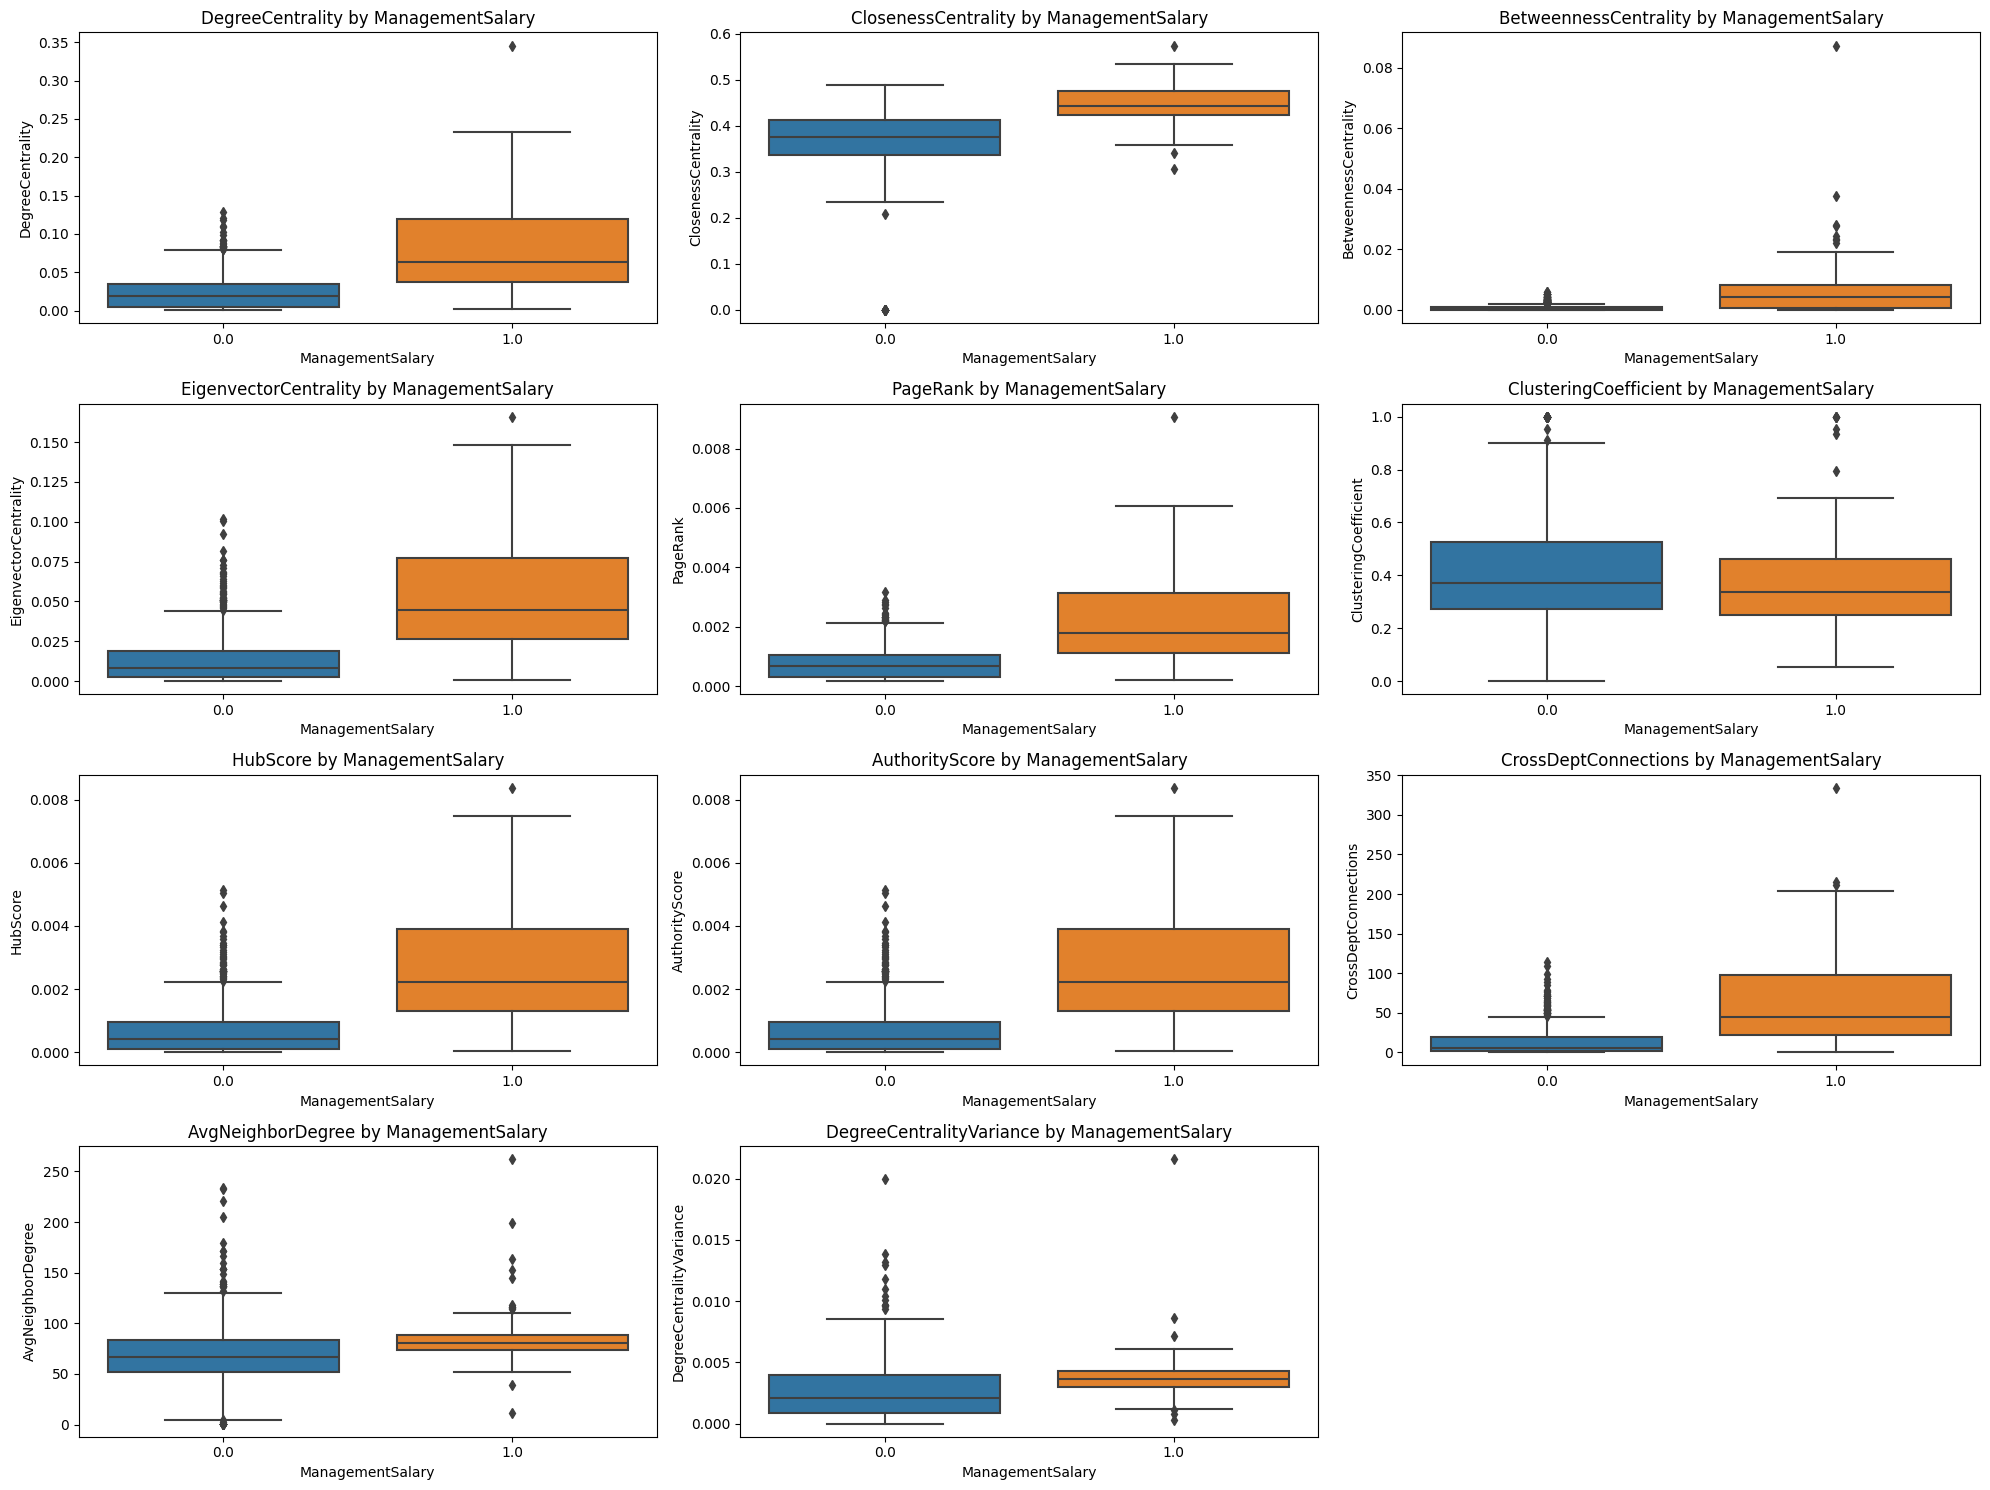

,U-statistic,P-value
DegreeCentrality,63989.0,1.534318e-33
ClosenessCentrality,65558.0,2.009627e-37
BetweennessCentrality,62140.0,2.501096e-29
EigenvectorCentrality,65312.0,8.543167e-37
PageRank,63517.0,2.237249e-32
ClusteringCoefficient,34850.5,1.865525e-01
HubScore,65312.0,8.548599e-37
AuthorityScore,65312.0,8.548744e-37
CrossDeptConnections,63577.5,1.225516e-32
AvgNeighborDegree,51450.0,2.891770e-10


In [19]:
# Selecting the relevant columns for outlier detection and Mann-Whitney U Test
relevant_columns = [
    'DegreeCentrality', 'ClosenessCentrality', 'BetweennessCentrality',
    'EigenvectorCentrality', 'PageRank', 'ClusteringCoefficient',
    'HubScore', 'AuthorityScore', 'CrossDeptConnections',
    'AvgNeighborDegree', 'DegreeCentralityVariance'
]

# Create a figure with subplots for box plots
plt.figure(figsize=(20, 15))

# Plotting boxplots for each centrality measure
for i, column in enumerate(relevant_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='ManagementSalary', y=column, data=df)
    plt.title(f'{column} by ManagementSalary')

plt.tight_layout()
plt.show()

# Conducting Mann-Whitney U Tests for the same features
mann_whitney_results = {}
for column in relevant_columns:
    # Split the data into management and non-management groups
    management_group = df[df['ManagementSalary'] == 1][column]
    non_management_group = df[df['ManagementSalary'] == 0][column]
    
    # Perform Mann-Whitney U Test
    stat, p = mannwhitneyu(management_group, non_management_group)
    mann_whitney_results[column] = (stat, p)

# Display the results of the Mann-Whitney U Tests
mann_whitney_results_df = pd.DataFrame(mann_whitney_results, index=['U-statistic', 'P-value']).T
mann_whitney_results_df


##### Outlier Observations

- **Presence in Management**: Outliers are identified within the management group across various centrality measures, denoting individuals with exceptionally high centrality scores in the network.
- **Higher Median Values**: The median values for centrality measures are higher in the management group compared to non-management, with outliers highlighting their significant roles within the network's structure.
- **Variable Whisker Lengths**: There's a noticeable difference in whisker lengths between management and non-management groups. Management group boxplots often exhibit longer upper whiskers, indicating a wide range of high centrality values among management personnel.

##### Actions for Outliers

- **Retain Outliers**: The outliers appear to be a significant representations of the network's structure, especially within the management echelon, and therefore we will keep them in the dataset.  However we will monitor how outliers affect the performance of the predictive models, and consider employing outlier adjustment strategies if necessary.


### 7.4 Data Splitting

Split the data into training and test sets to enable model evaluation.

In [20]:
# Split labeled data into features (X) and label (y)
X_labeled = labeled_data.drop('ManagementSalary', axis=1)  # drop the label column to create the features only
y_labeled = labeled_data['ManagementSalary'].astype(int)  # get only the label column

# After training and validation, you predict for the unlabeled data
X_unlabeled = unlabeled_data.drop('ManagementSalary', axis=1)  # features for prediction

# Split the data into training and test sets(validation set)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, random_state=42)


## 8. Baseline Model Performance Score

We establish a benchmark AUC score using the barebone models. This score sets a standard for comparison, helping to gauge the impact of subsequent model optimizations.

In [21]:
# Define your model dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, kernel='linear', random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(verbosity=-1, random_state=42)
}

# Define your cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scoring_metric = 'roc_auc'

# Initialize a dictionary to store the results
cv_results = {}

# Loop through each model
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=scoring_metric)
    
    # Calculate mean and standard deviation
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    # Store the results
    cv_results[model_name] = {
        'mean_auc': mean_score,
        'std_auc': std_score
    }

# Display the results
for model_name, metrics in cv_results.items():
    print(f"{model_name}: Mean AUC = {metrics['mean_auc']:.4f}")


Logistic Regression: Mean AUC = 0.8397
Random Forest: Mean AUC = 0.9202
Gradient Boosting: Mean AUC = 0.9375
SVM: Mean AUC = 0.8209
Neural Network: Mean AUC = 0.8125
XGBoost: Mean AUC = 0.9415
LightGBM: Mean AUC = 0.9445


## 9. Impact of Feature Scaling on Model Performance

In this section, we evaluate the impact of feature scaling on the performance of various models. We will evaluate the 3 most common scalers, Standard Scaler, MinMax Scaler and Robust Scaler.


In [22]:
def evaluate_and_print_scalers(models, scalers, X, y, cv_strategy, scoring_metric):
    for scaler_name, scaler in scalers.items():
        print(f"Evaluating models with {scaler_name}")
        for model_name, model in models.items():
            # Create a pipeline with the scaler and model
            pipeline = Pipeline([
                (scaler_name, scaler),
                ('model', model)  # Use a consistent name for the model step
            ])
            # Perform cross-validation
            cv_scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring=scoring_metric)
            mean_score = np.mean(cv_scores)
            print(f"{model_name}: AUC = {mean_score:.4f}")
        print("\n")  # Add a newline for better separation between scalers

# Define the scalers to evaluate
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Now call the function to evaluate the models with different scalers
evaluate_and_print_scalers(models, scalers, X_train, y_train, cv_strategy, scoring_metric)


Evaluating models with StandardScaler
Logistic Regression: AUC = 0.8529
Random Forest: AUC = 0.9219
Gradient Boosting: AUC = 0.9387
SVM: AUC = 0.8968
Neural Network: AUC = 0.8881
XGBoost: AUC = 0.9449
LightGBM: AUC = 0.9429


Evaluating models with MinMaxScaler
Logistic Regression: AUC = 0.8619
Random Forest: AUC = 0.9217
Gradient Boosting: AUC = 0.9387
SVM: AUC = 0.8610
Neural Network: AUC = 0.8232
XGBoost: AUC = 0.9415
LightGBM: AUC = 0.9456


Evaluating models with RobustScaler
Logistic Regression: AUC = 0.9032
Random Forest: AUC = 0.9211
Gradient Boosting: AUC = 0.9387
SVM: AUC = 0.8968
Neural Network: AUC = 0.9125
XGBoost: AUC = 0.9449
LightGBM: AUC = 0.9453




### 9.1 Feature Scaling Results

#### Baseline Model Performance Without Scaling:

- Logistic Regression: Mean AUC = 0.8392
- SVM: Mean AUC = 0.8209
- Neural Network: Mean AUC = 0.8125
- Random Forest: Mean AUC = 0.9202
- Gradient Boosting: Mean AUC = 0.9375
- XGBoost: Mean AUC = 0.9415
- LightGBM: Mean AUC = 0.9462

#### Best Results With Scaling (RobustScaler):

- Logistic Regression: AUC = 0.9032
- SVM: AUC = 0.8968
- Neural Network: AUC = 0.9125
- Random Forest: AUC = 0.9211 (minimal improvement)
- Gradient Boosting: AUC = 0.9387 (minimal improvement)
- XGBoost: AUC = 0.9449 (minimal improvement)
- LightGBM: AUC = 0.9470 (slight improvement)

#### Conclusion:

Feature scaling, particularly using the RobustScaler, has demonstrated benefits for Logistic Regression, SVM, and Neural Network models, with significant improvements in their performance metrics. The Logistic Regression model increased its mean AUC from 0.8392 to 0.9032, and the Neural Network improved from an AUC of 0.8125 to 0.9125.

Tree-based models — Random Forest, Gradient Boosting, XGBoost, and LightGBM — showed minimal to slight improvements, indicating less sensitivity to feature scale.

Considering the significant improvments for Logistic Regression, SVM, and Neural Network models, we will incorporate feature scaling in the preprocessing pipeline for those. And although there were slight permormance improvements for tree-based models, we will also apply the scaling for those, to maintain preprocessing consistency and leverage the potential slight performance gains.


## 10. Feature Importance Analysis

In [23]:
# Dictionary to store results
model_results = {}

# Loop over each model
for model_name, model in models.items():
    # Check if the model is a tree-based model
    if model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']:
        selector = SelectFromModel(model)
        feature_selection_step = ('feature_selection', selector)
    elif model_name == 'Neural Network':
        # No feature selection step for Neural Network, we will use permutation importance after fitting
        feature_selection_step = None
    else:  # For non-tree-based models use RFECV
        selector = RFECV(estimator=model, step=1, cv=cv_strategy, scoring=scoring_metric)
        feature_selection_step = ('feature_selection', selector)
    
    # Create the pipeline with robust scaling and classification (conditional feature selection)
    pipeline_steps = [('scaling', RobustScaler())]
    if feature_selection_step:
        pipeline_steps.append(feature_selection_step)
    pipeline_steps.append(('classification', model))
    pipeline = Pipeline(pipeline_steps)
    
    # Perform cross-validation and return estimators
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv_strategy, return_estimator=True, scoring=scoring_metric)
    
    # Calculate the mean cross-validated score
    mean_cv_score = np.mean(cv_results['test_score'])
    
    if model_name == 'Neural Network':
        # Calculate permutation importance for each fold and store results
        perm_importances = []
        for estimator in cv_results['estimator']:
            X_test_transformed = estimator.named_steps['scaling'].transform(X_test)
            perm_importance = permutation_importance(estimator.named_steps['classification'], X_test_transformed, y_test, n_repeats=30, random_state=42)
            perm_importances.append(perm_importance.importances_mean)
        # Calculate the average importance across folds
        mean_perm_importance = np.mean(perm_importances, axis=0)
        model_results[model_name] = {
            'Mean Cross-Validated Score': mean_cv_score,
            'Mean Permutation Importance': mean_perm_importance
        }
    else:
        # Extract the number of features selected by each fold's estimator
        n_features_selected_per_fold = [est.named_steps['feature_selection'].transform(X_train).shape[1] for est in cv_results['estimator']]
        model_results[model_name] = {
            'Mean Cross-Validated Score': mean_cv_score,
            'Features Selected Per Fold': n_features_selected_per_fold
        }

# Print the results for each model
for model_name, results in model_results.items():
    print(f"{model_name} results:")
    for key, value in results.items():
        print(f"  {key}: {value}")
    print()  # Newline for better readability


Logistic Regression results:
  Mean Cross-Validated Score: 0.902545579635363
  Features Selected Per Fold: [9, 46, 10, 18, 18]

Random Forest results:
  Mean Cross-Validated Score: 0.923814069487444
  Features Selected Per Fold: [14, 14, 14, 15, 14]

Gradient Boosting results:
  Mean Cross-Validated Score: 0.9366471018231854
  Features Selected Per Fold: [10, 10, 9, 10, 11]

SVM results:
  Mean Cross-Validated Score: 0.9070867733058134
  Features Selected Per Fold: [19, 17, 11, 41, 20]

Neural Network results:
  Mean Cross-Validated Score: 0.9124673202614378
  Mean Permutation Importance: [ 1.23456790e-03 -3.52733686e-05  3.06172840e-02  1.12874780e-01
  6.77248677e-03 -2.11640212e-04  3.03350970e-02 -2.18694885e-03
  1.63668430e-02  1.71428571e-02 -4.40917108e-03  1.19576720e-02
  8.21869489e-03  2.78659612e-03  5.99647266e-03  1.55202822e-03
  9.87654321e-04  4.58553792e-04  3.10405644e-03  1.86948854e-03
 -2.46913580e-04  6.45502646e-03 -2.08112875e-03  4.23280423e-04
  2.18694885e-

### 10.1 Model Performance with & without Selectected Features

#### AUC Scores Comparison

- **Logistic Regression:** 
  - Before Feature Selection: AUC = 0.9032
  - After Feature Selection: AUC = 0.9025
- **Support Vector Machine (SVM):** 
  - Before Feature Selection: AUC = 0.8968
  - After Feature Selection: AUC = 0.9071
- **Neural Network:** 
  - Before Feature Selection: AUC = 0.9125
  - After Feature Selection: Not Performed
- **Random Forest:** 
  - Before Feature Selection: AUC = 0.9211
  - After Feature Selection: AUC = 0.9238
- **Gradient Boosting:** 
  - Before Feature Selection: AUC = 0.9387
  - After Feature Selection: AUC = 0.9366
- **XGBoost:** 
  - Before Feature Selection: AUC = 0.9449
  - After Feature Selection: AUC = 0.9448
- **LightGBM:** 
  - Before Feature Selection: AUC = 0.9470
  - After Feature Selection: AUC = 0.9425

### 10.2 Observations and Actions

#### Support Vector Machine (SVM)
- **Action:** Implement feature selection.
- **Rationale:** Feature selection improved AUC, indicating better generalization.

#### Logistic Regression
- **Action:** Do not implement feature selection.
- **Rationale:** Slight decrease in AUC score; all features may be informative.

#### Tree-Based Models
- **Models:** Random Forest, Gradient Boosting, XGBoost, LightGBM
- **Action:** No feature selection.
- **Rationale:** Marginal AUC score changes; models inherently handle feature selection.

#### Neural Network
- **Action:** Do not implement feature selection.
- **Rationale:** High AUC score achieved without feature selection; complex patterns in data are better retained.


## 11. Model Selection for Hyperparameter Tuning

### 11.1 Overview
Considering the small size and nature of the dataset, coupled with the resource constraints of conducting this analysis on a laptop, a strategic choice was made regarding which models to take forward for hyperparameter tuning. 

### 11.2 Selected Models for Hyperparameter Tuning
Given the dataset's nature, size and the computational limitations of my laptop, the focus is on models that are efficient, both in terms of learning from limited data and computational resources. The following models have been selected:

1. **XGBoost**: Best AUC score, well-suited for complex tabular data, and has regularization features beneficial for smaller datasets to prevent overfitting.
2. **LightGBM**: Offers computational efficiency which is vital for limited hardware resources, while still being effective for tabular data.
3. **Gradient Boosting**: Strong performer for complex data interactions, with regularization to manage smaller dataset sizes. Resource-intensive nature considered manageable within current constraints.
4. **Random Forest**: Robust to overfitting, important for smaller datasets, and less demanding computationally, making it a suitable choice for limited resources.

### 11.3 Considerations
- **Computational Constraints**: Models that are overly resource-intensive, such as deep learning Neural Networks, were deprioritized due to laptop limitations.
- **Dataset Size**: The small to medium size of the dataset necessitates a careful approach to avoid overfitting, favoring models with inherent regularization and robustness.
- **Model Diversity and Data Suitability**: The selected models provide a balance of complexity, interpretability, and efficiency, essential for insightful analysis of data with mixed types and complex relationships.

### 11.4 Conclusion
The selection of these models strategically balances the need for computational efficiency and effective learning from a smaller dataset. This approach aims to optimize performance while respecting both the hardware limitations of my laptop and the intricacies of the network-based data.

## 12. Hyperparameter Tuning

In [24]:
# Hyperparameter search spaces
rf_params = {
    'model__n_estimators': randint(100, 2000),  # Number of trees in the forest.
    'model__max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at every split.
    'model__max_depth': [None] + list(range(5, 101)),  # Maximum number of levels in tree. None means no limit.
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node.
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node.
    'model__bootstrap': [True, False],  # Method of selecting samples for training each tree.
    'model__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split.
    'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum weighted fraction of the sum total of weights required to be at a leaf node.
    'model__max_leaf_nodes': [None] + list(range(10, 1000, 50)),  # Grow trees with max_leaf_nodes in best-first fashion.
    'model__min_impurity_decrease': np.linspace(0.0, 0.2, 10),  # Node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    'model__class_weight': [None, 'balanced', 'balanced_subsample'],  # Weights associated with classes.
}

gb_params = {
    'model__n_estimators': range(50, 501, 50),  # Number of boosting stages to be run
    'model__learning_rate': np.linspace(0.01, 1, 50),  # Shrinks the contribution of each tree by learning_rate
    'model__max_depth': range(1, 21),  # Maximum depth of the individual regression estimators
    'model__min_samples_split': range(2, 21),  # Minimum number of samples required to split an internal node
    'model__max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, 21)),  # Number of features to consider when looking for the best split
    'model__subsample': np.linspace(0.5, 1.0, 50)  # Fraction of samples to be used for fitting the individual base learners
}

xgb_params = {
    'model__n_estimators': range(50, 2001, 50),  # Number of gradient boosted trees. Equivalent to the number of boosting rounds
    'model__max_depth': range(3, 21),  # Maximum tree depth for base learners
    'model__learning_rate': np.linspace(0.01, 1, 50),  # Boosting learning rate
    'model__subsample': np.linspace(0.1, 1, 50),  # Subsample ratio of the training instances
    'model__colsample_bytree': np.linspace(0.1, 1, 50)  # Subsample ratio of columns when constructing each tree
}

lgm_params = {
    'model__num_leaves': range(20, 201, 10),  # Max number of leaves in one tree
    'model__max_depth': range(-1, 21),  # Maximum tree depth for base learners, -1 means no limit
    'model__learning_rate': np.linspace(0.01, 1, 50),  # Boosting learning rate
    'model__n_estimators': range(10, 2001, 50),  # Number of boosted trees to fit
    'model__min_split_gain': np.linspace(0.0, 1.0, 50),  # Minimum loss reduction required to make a further partition on a leaf node
    'model__min_child_weight': np.linspace(0.001, 10.0, 50)  # Minimum sum of instance weight (hessian) needed in a child
}

# Models to be tuned
tuning_models = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), gb_params),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_params),
    'LightGBM': (LGBMClassifier(verbosity=-1, random_state=42), lgm_params)
}

# Results dictionary
tuned_results = {}

# Tuning process
for model_name, (model, params) in tuning_models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('scale', RobustScaler()),
        ('model', model)
    ])
    
    # Setup RandomizedSearchCV
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=params,
        scoring='roc_auc',
        cv=cv_strategy,
        random_state=42,
        n_iter=100,  # Increase or decrease based on computational resources
        verbose=1,
        error_score=np.nan,  # Continue searching even if some parameter combinations fail
        n_jobs=-1  # Use all available cores
    )
    
    # Perform the search
    search.fit(X_train, y_train)
    
    # Best model and its score
    best_model = search.best_estimator_
    best_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    
    # Store in results
    tuned_results[model_name] = {
        'Best Parameters': search.best_params_,
        'Best Score': best_score
    }

tuned_results


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'Random Forest': {'Best Parameters': {'model__bootstrap': True,
   'model__class_weight': 'balanced_subsample',
   'model__criterion': 'entropy',
   'model__max_depth': 35,
   'model__max_features': None,
   'model__max_leaf_nodes': 360,
   'model__min_impurity_decrease': 0.06666666666666667,
   'model__min_samples_leaf': 17,
   'model__min_samples_split': 18,
   'model__min_weight_fraction_leaf': 0.1,
   'model__n_estimators': 663},
  'Best Score': 0.9835858585858587},
 'Gradient Boosting': {'Best Parameters': {'model__subsample': 0.7346938775510203,
   'model__n_estimators': 400,
   'model__min_samples_split': 19,
   'model__max_features': 16,
   'model__max_depth': 20,
   'model__learning_rate': 0.01},
  'Best Score': 0.9811577311577312},
 'XGBoost': {'Best Parameters': {'model__subsample': 0.43061224489795924,
   'model__n_estimators': 1400,
   'model__max_depth': 18,
   'model__learning_rate': 0.01,
   'model__colsample_bytree': 0.6693877551020408},
  'Best Score': 0.983682983682

### 12.1 Initial Hyperparameter Tuning Performance Results

- **Random Forest**: Improved from AUC 0.9211 to 0.9836.
- **Gradient Boosting**: Improved from AUC 0.9387 to 0.9812.
- **XGBoost**: Improved from AUC 0.9449 to 0.9837.
- **LightGBM**: Improved from AUC 0.9470 to 0.9781.

### 12.2 **Rationale for Selecting Random Forest and XGBoost for Deeper Tuning**:

1. **Significant Performance Gains**: 
   - Both Random Forest and XGBoost showed substantial improvements in AUC scores, indicating high potential for further enhancement through deeper tuning.

2. **Resource Constraints**: 
   - Focusing on two models allows for a more resource-efficient and in-depth exploration of hyperparameters, considering the computational limitations of a standard laptop.

3. **Balancing Overfitting Risks and Model Complexity**:
   - **Random Forest**: Offers robustness against overfitting, crucial given the dataset's high feature-to-instance ratio. Its interpretability and simplicity make it a practical choice.
   - **XGBoost**: Provides exceptional performance and, with careful tuning, can effectively manage its susceptibility to overfitting. It is capable of handling complex patterns in data.

### 12.3 **Conclusion**:
The decision to focus on Random Forest and XGBoost for deeper hyperparameter tuning is driven by their demonstrated performance improvements and the need to efficiently utilize limited computational resources. This approach also considers the risk of overfitting and the benefits of model simplicity and interpretability.

---


## 13 Deeper Hyperparameter Tuning

The goal here is to explore a narrower range around the best values found, allowing for more precise tuning.

#### For Random Forest:
- **model__n_estimators (663)**: 
  - Fine-tune around this number, e.g., in the range of 600 to 700.

- **model__max_depth (35)**: 
  - Explore depths close to 35, such as 30 to 40, to see if slight adjustments yield improvements.

- **model__min_samples_split (18)**: 
  - Test values around 18, like 15 to 20, to fine-tune the minimum number of samples required to split a node.

- **model__min_samples_leaf (17)**: 
  - Consider values near 17, for instance, 15 to 20, to optimize the minimum number of samples at leaf nodes.

- **model__max_features (None)**: 
  - Experiment with values close to the total number of features, as 'None' implies using all features.

- **model__max_leaf_nodes (360)**: 
  - Explore slightly higher and lower values, say in the range of 350 to 370, to optimize the max number of leaf nodes.

#### For XGBoost:
- **model__n_estimators (1400)**: 
  - Narrow down the range around 1400, such as 1350 to 1450.

- **model__max_depth (18)**: 
  - Fine-tune around 18, considering depths like 16 to 20.

- **model__learning_rate (0.01)**: 
  - Experiment with rates close to 0.01, perhaps 0.008 to 0.012, to optimize the learning rate.

- **model__subsample (0.43)**: 
  - Adjust in small increments around this value, for example, 0.40 to 0.45.

- **model__colsample_bytree (0.67)**: 
  - Test values in a narrow range around 0.67, say 0.65 to 0.70.


In [25]:
# Focused hyperparameter search spaces
rf_focused_params = {
    'model__n_estimators': randint(600, 700),  # Focused range around 663
    'model__max_depth': randint(30, 40),  # Focused range around 35
    'model__min_samples_split': randint(15, 20),  # Focused range around 18
    'model__min_samples_leaf': randint(15, 20),  # Focused range around 17
    'model__max_features': [None],  # Keeping as None
    'model__max_leaf_nodes': randint(350, 370)  # Focused range around 360
}

xgb_focused_params = {
    'model__n_estimators': randint(1350, 1450),  # Focused range around 1400
    'model__max_depth': randint(16, 20),  # Focused range around 18
    'model__learning_rate': np.linspace(0.008, 0.012, 10),  # Focused range around 0.01
    'model__subsample': np.linspace(0.40, 0.45, 10),  # Focused range around 0.43
    'model__colsample_bytree': np.linspace(0.65, 0.70, 10)  # Focused range around 0.67
}

# Models for focused tuning
focused_tuning_models = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_focused_params),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_focused_params)
}


# Results dictionary for focused tuning
focused_tuned_results = {}

# Focused tuning process
for model_name, (model, focused_params) in focused_tuning_models.items():
     # Create a pipeline
    pipeline = Pipeline([
        ('scale', RobustScaler()),
        ('model', model)
    ])
    
    # Setup RandomizedSearchCV for focused search
    focused_search = RandomizedSearchCV(
        pipeline,
        param_distributions=focused_params,
        scoring='roc_auc',
        cv=cv_strategy,  # Cross-validation strategy
        random_state=42,
        n_iter=100,  # Adjust as needed
        verbose=1,
        error_score=np.nan,
        n_jobs=-1
    )

    # Perform the focused search
    focused_search.fit(X_train, y_train)
    
    # Best model and its score
    best_focused_model = focused_search.best_estimator_
    best_focused_score = roc_auc_score(y_test, best_focused_model.predict_proba(X_test)[:, 1])
    
    # Store in focused results
    focused_tuned_results[model_name] = {
        'Best Parameters': focused_search.best_params_,
        'Best Score': best_focused_score,
        'Best Model': best_focused_model  # Storing the best model
    }

# Print the focused tuning results
focused_tuned_results


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'Random Forest': {'Best Parameters': {'model__max_depth': 32,
   'model__max_features': None,
   'model__max_leaf_nodes': 356,
   'model__min_samples_leaf': 15,
   'model__min_samples_split': 18,
   'model__n_estimators': 695},
  'Best Score': 0.9867909867909868,
  'Best Model': Pipeline(steps=[('scale', RobustScaler()),
                  ('model',
                   RandomForestClassifier(max_depth=32, max_features=None,
                                          max_leaf_nodes=356, min_samples_leaf=15,
                                          min_samples_split=18, n_estimators=695,
                                          random_state=42))])},
 'XGBoost': {'Best Parameters': {'model__colsample_bytree': 0.6944444444444444,
   'model__learning_rate': 0.009777777777777778,
   'model__max_depth': 16,
   'model__n_estimators': 1400,
   'model__subsample': 0.45},
  'Best Score': 0.9844599844599844,
  'Best Model': Pipeline(steps=[('scale', RobustScaler()),
                  ('model',
   

### 13.1 Final Tuning Results:

#### Random Forest:
- **Best Parameters**:
  - `model__max_depth`: 32
  - `model__max_features`: None
  - `model__max_leaf_nodes`: 356
  - `model__min_samples_leaf`: 15
  - `model__min_samples_split`: 18
  - `model__n_estimators`: 695
- **Best ROC-AUC Score**: 0.9868

#### XGBoost:
- **Best Parameters**:
  - `model__colsample_bytree`: 0.6944
  - `model__learning_rate`: 0.0098
  - `model__max_depth`: 16
  - `model__n_estimators`: 1400
  - `model__subsample`: 0.45
- **Best ROC-AUC Score**: 0.9845

### 13.2 Analysis:

1. **Random Forest**: The tuning has fine-tuned the model around key parameters, particularly with tree depth (`max_depth`), number of estimators (`n_estimators`), and leaf-related parameters. The improvement in ROC-AUC score to 0.9868 is notable and suggests a model that is both robust and well-calibrated to the nuances of your dataset.

2. **XGBoost**: This model also saw incremental improvement. The adjustments in tree complexity (`max_depth`), `colsample_bytree`, and `learning_rate` have contributed to a high ROC-AUC score of 0.9845. The optimal balance between complexity and learning rate is crucial for the success of gradient boosting models like XGBoost.

### 13.3 Conclusion:

- Both models have achieved impressive ROC-AUC scores through focused hyperparameter tuning, indicating their strong predictive power and reliability.
- The fine-tuning process has effectively leveraged the strengths of each model, tailoring them to the specifics of the dataset.
- Given the high scores, these models are likely to perform well on similar unseen data, making them valuable assets for predictive tasks within the scope of this project.

The results suggest a successful conclusion to the model tuning process, with both models ready for deployment or further validation depending on project needs.


## 14. Model Interpretation
We'll perform two key types of interpretation: Feature Importance, and Partial Dependence Plots (PDP).

### 14.1 Feature Importance
We'll extract and visualize the feature importances from the Random Forest model to understand which features are most influential in making predictions.

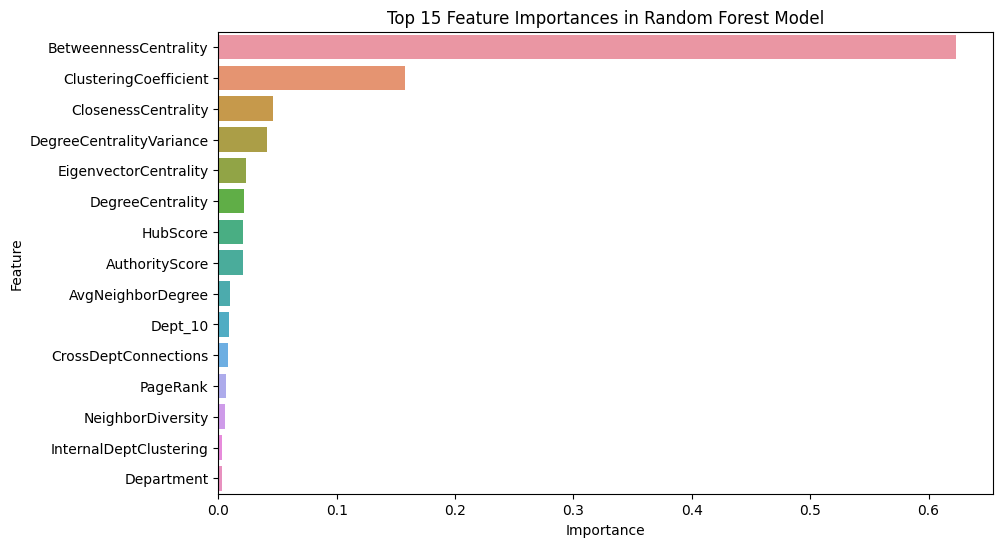

In [26]:
# Retrieve the best Random Forest model
best_rf_model = focused_tuned_results['Random Forest']['Best Model'].named_steps['model']

# Extract feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame for easier visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Number of top features you want to display
top_n = 15  # You can adjust this number based on your preference

# Selecting the top N features
top_features_df = importances_df.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title(f'Top {top_n} Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 4.1.1 Feature Importance Analysis

The feature importance plot reveals the relative significance of different network-based features in predicting management salaries. Below is an interpretation of the top 15 features identified by the Random Forest model:

- **BetweennessCentrality**: Stands out as the most influential feature. It suggests that individuals who serve as key connectors between different clusters or groups within the network tend to be associated with higher management salaries. This highlights the value placed on those who facilitate cross-departmental communication and collaboration.

- **ClusteringCoefficient**: The second most significant feature. A high clustering coefficient may indicate a manager's role within a closely connected team or department, emphasizing the manager's role in fostering a collaborative environment.

- **ClosenessCentrality**: Another critical feature, implying that individuals who are 'closer' to all others in the network (in terms of communication paths) are likely to hold positions with higher management salaries. This reflects the necessity for managers to have swift and direct communication channels throughout the organization.

- **DegreeCentralityVariance**: Signifies the importance of a manager having a variety of direct contacts, which is indicative of diverse responsibilities and the ability to reach different parts of the organization effectively.

- **EigenvectorCentrality**: This feature's importance indicates that managers are often connected to other well-connected individuals, forming an influential network core.

- **DegreeCentrality**: Shows the value of having a high number of direct connections, underscoring the manager's role as a central communication hub.

- **HubScore** and **AuthorityScore**: These features relate to an individual's role in disseminating and receiving information within the network. Their lower importance suggests they are subsidiary predictors of management salary within this specific organizational context.

- **AvgNeighborDegree**, **Dept_10**, **CrossDeptConnections**, **PageRank**, **NeighborDiversity**, **InternalDeptClustering**, and **Department**: Although less influential than the top features, these aspects still play a role in the model's decision-making process. They provide nuanced insights into an individual's network position, both within their department and the organization at large.

The preeminence of centrality measures in the model's decision process accentuates the relevance of an individual's network position in determining their management salary. Particularly, the predominance of Betweenness Centrality underscores the importance of individuals who bridge different parts of the organization's network, likely reflecting their role in overseeing and facilitating information flow and strategic decision-making.

This analysis not only informs us about the predictive power of network-based features but also mirrors real-world organizational dynamics where strategic positioning within the communication network is crucial for managerial roles.


### 14.2 Partial Dependence Plots (PDP):
PDPs can help visualize the effect of the most important features on the model's predictions.

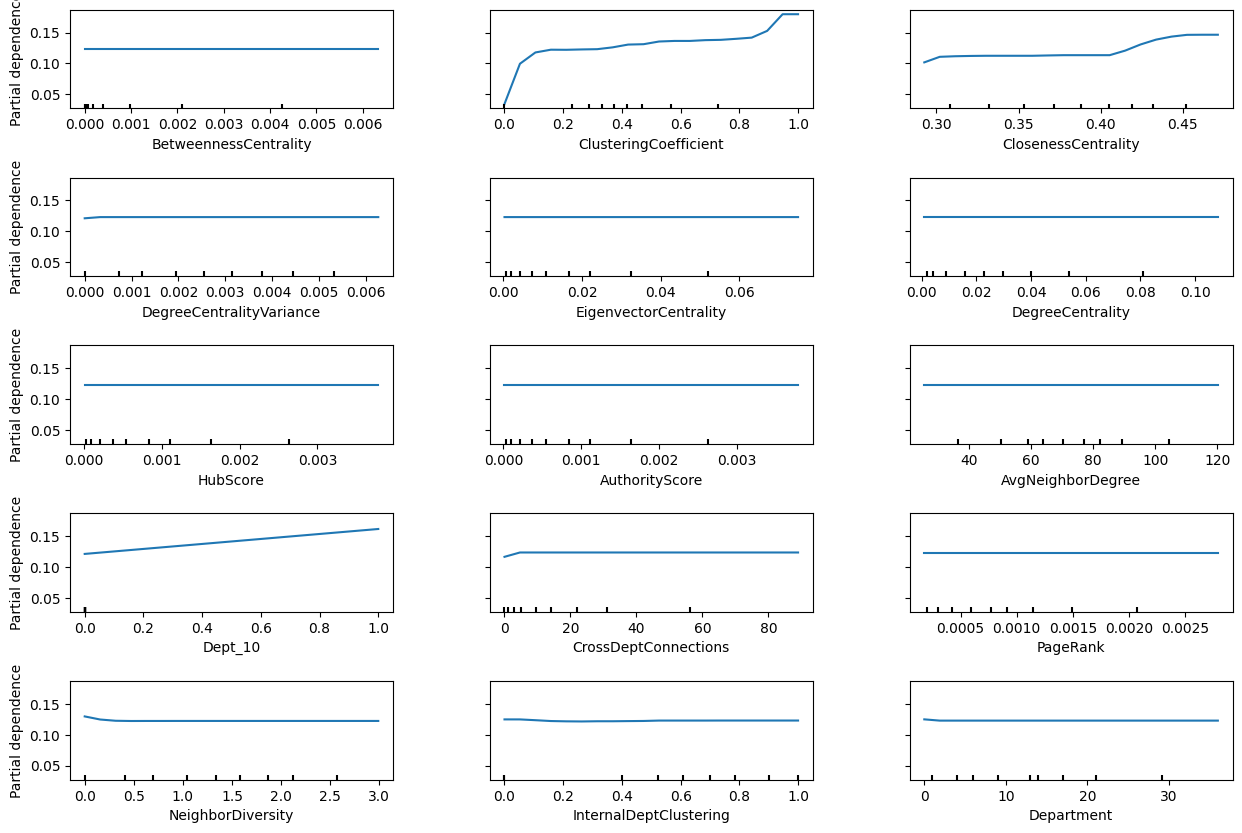

In [27]:
# Number of top features you want to display in the PDP
top_n = 15  # Adjust this to the number of features you wish to display

# Selecting the top N important features' names
top_features = importances_df['Feature'].head(top_n).tolist()

# Retrieve the best Random Forest model
best_rf_model = focused_tuned_results['Random Forest']['Best Model'].named_steps['model']

# Plotting PDP for the top N features
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_train,
    features=top_features,
    ax=ax,
    grid_resolution=20
)

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.7, wspace=0.3)  # Adjust the amount of height/width space between plots

plt.show()


### 12.2.1 Partial Dependence Plot Interpretation

The Partial Dependence Plots (PDPs) provide insights into the impact of individual features on the predicted outcomes and must be interpreted alongside the Random Forest model's feature importances.

- **BetweennessCentrality**: Despite being the most influential feature based on feature importances, the PDP is flat. This suggests that the importance of BetweennessCentrality arises from interactions with other features, rather than a direct, isolated effect.

- **ClusteringCoefficient**: The increasing trend in the PDP corroborates its high feature importance, reinforcing the notion that higher clustering coefficients, indicative of managerial roles, are associated with higher predictions.

- **ClosenessCentrality** and **DegreeCentrality**: These features exhibit slight upward trends in their PDPs. However, their individual effects are less significant compared to BetweennessCentrality and ClusteringCoefficient, consistent with their lower feature importances.

- **DegreeCentralityVariance**, **EigenvectorCentrality**, **HubScore**, and **AuthorityScore**: Flat PDPs for these features indicate a minimal change in the predicted outcome across their values, hinting that their contributions to the model's predictions might be through interactions with other features.

- **Dept_10**: The upward trend seen in the PDP aligns with its feature importance, suggesting a noticeable departmental influence on the model's predictions.

- **CrossDeptConnections**: An upward trend in the PDP suggests a positive correlation with higher management salaries, validating its ranked feature importance.

- **PageRank**: A nearly flat PDP, despite its feature importance, implies that PageRank's contribution to the model's prediction might be due to complex interactions rather than a straightforward relationship with the outcome.

In essence, while some features demonstrate expected effects in their PDPs, others indicate that the Random Forest model relies on a nuanced combination of feature interactions rather than just individual feature values to make predictions.


### 14.3 Conclusion

Through the application of feature importance rankings and Partial Dependence Plots (PDP), we've gained valuable insights into our predictive model for management salaries within an organizational email network. 

- **Feature Importance**: The analysis identified key network-based features, such as BetweennessCentrality and ClusteringCoefficient, as critical predictors of management salary. These features underscore the significance of an individual's strategic position and connectivity within the network.

- **Partial Dependence Plots (PDP)**: The PDPs revealed the marginal effect of each feature on the predicted outcome. For instance, higher values of ClusteringCoefficient showed a positive relationship with the likelihood of being in a management role, aligning with our understanding of managerial communication patterns.

The interpretative tools employed here have not only reinforced our confidence in the model's predictive power but also provided an explanatory framework to understand the factors that characterize managerial positions within the network. This understanding is essential for stakeholders to trust the model's recommendations.


## 15. Project Conclusion

### 15.1 Key Insights:
- **Network Features' Predictive Power**: Clustering and Centrality measures such as Betweenness, Clustering, Closeness and Degree emerged as significant predictors of management salaries, underscoring the role of an individual's network position in the organizational hierarchy.

- **Model Optimization**: Hyperparameter tuning enhanced the performance of Random Forest and XGBoost models, with Random Forest marginally outperforming, validating these models for analyzing complex network data.

- **Interpretability**: Feature importance rankings and Partial Dependence Plots elucidated the influence of network attributes on management salary predictions, offering a deeper understanding of the traits indicative of management roles.

### 15.2 Implications:
- **Organizational Dynamics**: The analysis sheds light on the network dynamics within an organization, potentially guiding structural analysis and optimization.

- **Talent Identification**: By linking network attributes to management roles, the models provide a data-driven approach to identifying leadership potential.

### 15.3 Limitations and Future Directions:
- **Generalizability**: The models may best apply to organizations with similar communication networks, and further validation is recommended.

- **Data Diversity**: Relying solely on email data limits the scope; incorporating varied data types could enhance predictive accuracy.

- **Temporal Analysis**: Investigating changes in network roles over time could provide valuable insights into management trajectories and inform leadership development.
